In [1]:
import h5py
import numpy as np
import pandas as pd
import torch
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
from scipy.interpolate import interp1d


In [2]:
%load_ext rpy2.ipython

In [3]:

predictions = np.array(h5py.File('./sei_data/test_predictions.h5','r')['/predictions'], dtype=np.float32)
targets = np.array(h5py.File('./sei_data/test_predictions.h5','r')['/targets'], dtype=np.float32)

preds = predictions
targets = targets

In [4]:
#test purpose - change to full pass

aucs=[]
aps = []
pr_ys = []
roc_ys = []
Ns = []
x_formatted = np.linspace(0,1,1000)


for i in range(preds.shape[1]):
    print(i)
    N = targets[:,i].sum()
    if N>25:
        pred = preds[:,i]
        target = targets[:,i]
        auc = roc_auc_score(target,pred)
        ap = average_precision_score(target,pred)
        pr_y, pr_x, _ = precision_recall_curve(target,pred)
        roc_x, roc_y, _ = roc_curve(target,pred)
        aucs.append(auc)
        aps.append(ap)
        #reduce the curves to 1000 dots
        roc_ys.append(interp1d(roc_x, roc_y)(x_formatted))
        pr_ys.append(interp1d(pr_x, pr_y)(x_formatted))
        Ns.append(N)
        print(auc)
        print(ap)
    else:
        aucs.append(np.nan)
        aps.append(np.nan)
        Ns.append(np.nan)
        pr_ys.append(np.nan)
        roc_ys.append(np.nan)

0
0.9875461024169137
0.04026524512486767
1
0.9626214334128583
0.3798831389522026
2
0.9873636220945383
0.5183227131319633
3
0.9546650624218376
0.20729514966619877
4
0.9599783645392189
0.12255035124525669
5
0.9426097922473636
0.389090995010832
6
0.9220305949650031
0.3474347253200406
7
0.9816352410864523
0.05996511811907725
8
0.944919974923997
0.015299705351826525
9
0.9859159934800348
0.09431508760004208
10
0.9863991972988827
0.22860366776111576
11
0.9952899575071177
0.3730128847341085
12
0.9919369129731319
0.16989843374929117
13
0.989590854039405
0.20101772436594634
14
0.9860188959755282
0.2575334722463646
15
0.9875436057039414
0.5037495672002088
16
0.9725525330551466
0.3804444401802721
17
0.9815857978338991
0.4782584098053265
18
0.9673363493829421
0.33865209027224374
19
0.9813867490596929
0.3308531657129856
20
0.9816175788432351
0.38510691709549083
21
0.9772035335065934
0.1010370158546465
22
0.9606694551576246
0.16248639465843523
23
0.9833543441530839
0.11523800256402825
24
0.9709224375

0.9736851573627165
0.4803909557687721
199
0.9525790036083216
0.17222007546320572
200
0.9532916655040446
0.12718830074651655
201
0.9950903007327333
0.8148466366534931
202
0.9958499404217623
0.6344002993403339
203
0.9360994538203882
0.1968730278895815
204
0.9890353829799376
0.5277259801519136
205
0.9930673350131936
0.451230807328629
206
0.9860460617060283
0.363469976006686
207
0.9834815565290804
0.3444388434759624
208
0.9773991871192547
0.21576320392312315
209
0.9735370336567235
0.06615150542592517
210
0.9778900778607563
0.16264044762855426
211
0.9759202892690562
0.08961357279769196
212
0.9845963841609005
0.5621199196839404
213
0.9822669911798495
0.5709384124553827
214
0.9865333278951225
0.539178978888678
215
0.9851130278365877
0.5294525919136126
216
0.9872352987737715
0.1958348228277599
217
0.9748418519358528
0.2999469686139239
218
0.9675452306419108
0.35062658006966024
219
0.9760142515559527
0.2957863915055317
220
0.9768230697398725
0.2336417473821351
221
0.9784327176480979
0.258732907

0.9882261798681989
0.13922969445426803
393
0.9924009945488559
0.29998093430565076
394
0.9899686142341904
0.27550509764964426
395
0.9927086963146429
0.3594839918260401
396
0.9937535406845416
0.2990246814289105
397
0.9834688627842731
0.5495412885963433
398
0.9850760148165709
0.4916187954565407
399
0.9899723264112199
0.1400092933084499
400
0.9965633932864295
0.7406272261210878
401
0.9974922180944532
0.7306331388037617
402
0.9902590967277031
0.5585875178119087
403
0.9865480667268479
0.5532313548363491
404
0.9942884829692813
0.6559429938224058
405
0.9737465109010901
0.03167961895371809
406
0.98228448291411
0.3728372317211386
407
0.9882044359937453
0.5801683356000591
408
0.9872759921662455
0.1551320681729078
409
0.9869886798679623
0.34840138314928315
410
0.9851677946159042
0.4572227151281891
411
0.7717630966358305
0.015566494716810044
412
0.8449346931239654
0.08591157906352583
413
0.9919592182485168
0.36375519646912613
414
0.9984183170953901
0.33189981441047495
415
0.9941128015753448
0.30530

0.9577219269036624
0.6151699566686863
588
0.9973776881992689
0.7080274585519417
589
0.9968822710832667
0.765767160524677
590
0.9975955415380496
0.7676553652427487
591
0.9966138703136763
0.7663239284474619
592
0.9964757069561906
0.7614966258999046
593
0.9978082134241955
0.6972818190062744
594
0.9914200450763204
0.5645531294823761
595
0.9935636693418247
0.6676581184229691
596
0.9937152304437891
0.6702587237210856
597
0.98423846110108
0.5934278063032116
598
0.9903355809275257
0.589185142591358
599
0.9784924372999215
0.5431008753874141
600
0.9791006120440792
0.5364001565482022
601
0.9726509409171487
0.44859151914110185
602
0.978649915703621
0.5439070262059986
603
0.9747885792085065
0.5348550079826191
604
0.983177628192947
0.5122147621792348
605
0.9821060649278011
0.52404663011759
606
0.9831709878534943
0.5453321905819553
607
0.9889389702626689
0.5522445669286735
608
0.9749329350760547
0.5175296360349305
609
0.992699966133478
0.6150050546305164
610
0.9946555850829305
0.6354697880959101
611


0.9870239993792007
0.21776612046223962
783
0.9817585004264179
0.3242901150788985
784
0.8531535894521128
0.09879110358895682
785
0.8929612690141939
0.14162034249460703
786
0.9725444055647237
0.36098812680854403
787
0.9886557341766348
0.43165338706343537
788
0.9905175668082626
0.3030065231751519
789
0.9877503042447955
0.13851455477095398
790
0.984624082752636
0.4643470247731436
791
0.9843099783939045
0.5048341109725117
792
0.9930372720715188
0.3770543149300563
793
0.9731884551987361
0.39442370747091915
794
0.9959945736893008
0.11493039539135635
795
0.9770102198843023
0.17311962356609897
796
0.9903978398761427
0.3694119670478049
797
0.9945042240294893
0.5933230108504252
798
0.9932083926945774
0.6230373272703897
799
0.9925350422151991
0.5893961435415782
800
0.9839835398779366
0.40568435602189024
801
0.9808740460596114
0.48488878701512844
802
0.9886326981627341
0.3478766942723531
803
0.9869573076580757
0.30945669618316607
804
0.9940282424199823
0.29846087308113534
805
0.9534806070044348
0.3

0.9395907698743574
0.017143987204807705
1010
0.9742008519389129
0.28760626059173533
1011
0.9725514303560755
0.0069455479706159555
1012
0.9757851747689489
0.0676919600255414
1013
0.9931744653202872
0.5710558698142065
1014
0.9836510360145956
0.48852349762581787
1015
0.9669284676682606
0.16695607841197854
1016
0.9539554245495496
0.08736446253015072
1017
0.9782901940585227
0.20001597584016823
1018
0.9861200546400521
0.3829545080005965
1019
0.9823914862401474
0.4224899655392147
1020
0.9637991199799105
0.06581739834172202
1021
0.992534173359394
0.47605136233770706
1022
0.9902996020390409
0.5396490889697951
1023
0.9396002341745641
0.006493726332180482
1024
0.9600374470045944
0.022489644382210773
1025
0.9897538471670478
0.6094680665090881
1026
0.9983439205102675
0.5926738902344963
1027
0.9844516502863214
0.26481465631419027
1028
0.953633655206901
0.10427889968036931
1029
0.987593841183749
0.13949717953109342
1030
0.9955334483561504
0.7263585759334337
1031
0.8043280276555719
0.04122864658760189

0.9589954602889373
0.1905305195723168
1199
0.9716860895798324
0.08931972425780903
1200
0.9645263148669643
0.10722427722521516
1201
0.9666179377725688
0.29491319037596814
1202
0.9720071485317185
0.22648458317777748
1203
0.9708710575869487
0.2967957845397223
1204
0.968253377747516
0.04360587870188433
1205
0.9819506929183096
0.058731588430270355
1206
0.9514982158133677
0.23862328795207746
1207
0.9711881990413207
0.17450087796808522
1208
0.9532060967042999
0.3170262295575504
1209
0.9711879236881481
0.1479487462287717
1210
0.9655875613646902
0.13340818709436253
1211
0.9793181016441448
0.24216878725932228
1212
0.9711544539057224
0.2756931109303179
1213
0.9586596548564187
0.08128863441913231
1214
0.9567527139150895
0.1712171603076076
1215
0.9538478794967263
0.31615578746966344
1216
0.9693362459072778
0.18022697481585792
1217
0.971504256221485
0.12334955111489355
1218
0.9722446902284126
0.09715833950785449
1219
0.9908955699260525
0.18234586623995375
1220
0.9899684066752507
0.4853686592620916
1

0.9969124710996186
0.5425977805183473
1390
0.9922230665730399
0.657345748051033
1391
0.980772953698795
0.35527767863243986
1392
0.9933394768864401
0.5764583334179042
1393
0.9722878523129609
0.08114764993087065
1394
0.9976803593428006
0.779911875311416
1395
0.9846281590965956
0.4756317308824162
1396
0.9679943318239705
0.06478340678884324
1397
0.9970698200216265
0.759923764026895
1398
0.9907391070885676
0.42521032967756567
1399
0.9627889148269618
0.12620773970735716
1400
0.9921958113722485
0.2912557213127876
1401
0.9954154753872554
0.6929149983287382
1402
0.9889474475951594
0.5454307737831741
1403
0.9716057232618864
0.1434974466584116
1404
0.9984756296797794
0.6512325378735813
1405
0.9836237527384254
0.09536933122780866
1406
0.9692517262697087
0.10675720509121717
1407
0.9840585857064473
0.3860294819901341
1408
0.969616138297736
0.3115585679692435
1409
0.980413092103926
0.15275293275762147
1410
0.972145765830958
0.15745297268761166
1411
0.8439571826132165
0.04947984094982477
1412
0.785847

0.9976501309062402
0.7882228248533287
1579
0.9703355518286965
0.2630048255684234
1580
0.9962770154175934
0.8280870538710745
1581
0.9966054547106775
0.8216391481930491
1582
0.998516003142007
0.8116354122283105
1583
0.9989227946438528
0.8045833130457214
1584
0.9684906803952752
0.20557052370807724
1585
0.999091373134028
0.7925348133718841
1586
0.9807505430722124
0.13426890934783753
1587
0.9728788118819401
0.26488515270007607
1588
0.9812500724957658
0.03601816158364781
1589
0.9741988224846424
0.20056016923259465
1590
0.9699199099209103
0.2341614122518062
1591
0.9945286465758677
0.7798380256667532
1592
0.9859312370724284
0.06670129980305471
1593
0.9840164228951507
0.29464204096295504
1594
0.9949786833106603
0.39530152002674135
1595
0.9895730988733736
0.5360024107846122
1596
0.9515726065093579
0.34783884627357065
1597
0.9347434989572994
0.16220394588239267
1598
0.9392599074535641
0.28457862649911037
1599
0.9645655012765295
0.11684406486852164
1600
0.9761911546159284
0.4939833869386052
1601
0

0.9803374395896615
0.41675449859761354
1770
0.9930021037559223
0.3794814522160405
1771
0.9819545836209761
0.37180137431693494
1772
0.9950560663174438
0.7754062285457639
1773
0.9904797681118969
0.33680564321384515
1774
0.9955496451893422
0.7565215207978475
1775
0.9805755111031548
0.016462713805886008
1776
0.9805287088935907
0.40604990983953315
1777
0.9958612708959572
0.6645480973821402
1778
0.9960568731010631
0.7592914933204816
1779
0.9890264489301899
0.40302722598383145
1780
0.9895090037449938
0.5531329973002527
1781
0.9702887901028127
0.30509372981521554
1782
0.9936923466252572
0.4283966167223783
1783
0.9982801825036695
0.7521656155586024
1784
0.9978707035596284
0.7542732768153073
1785
0.9636665764095756
0.2818986082607432
1786
0.9965325800815226
0.7539804969327836
1787
0.9682158926491496
0.12330007862078349
1788
0.9925632104112085
0.6125098169767936
1789
0.9809447688870908
0.4771106160153814
1790
0.9585783624679535
0.23553876500698476
1791
0.9922502336371479
0.7083805489746805
1792
0

0.9344200088417957
0.002740891832369108
1959
0.9932001678137886
0.2167484054282385
1960
0.9881565973559902
0.1460520413059057
1961
0.9546974823082598
0.010770536446373644
1962
0.9576999446512677
0.012355761760305997
1963
0.9732345552355013
0.41823154131168677
1964
0.9878223180338943
0.1630375323820604
1965
0.8550186328537709
0.007693250117185516
1966
0.9761025354529708
0.42450927866541494
1967
0.900156518834446
0.006774719583181601
1968
0.927294603306373
0.007156925367165702
1969
0.9529386956599593
0.00641506909211381
1970
0.9740919204055332
0.42562578592749123
1971
0.7863989359096607
0.004705825688215041
1972
0.9078330262345322
0.006822622707119047
1973
0.930364245685901
0.007770747783576821
1974
0.988027309052515
0.2551196079844118
1975
0.9817180699538987
0.08503322817968914
1976
0.9851240667212512
0.5955457022592759
1977
0.9931201773428381
0.6526805041736077
1978
0.9908793865876984
0.6154914746190112
1979
0.9844987607129173
0.6150911361220629
1980
0.9802422609931407
0.57966260256874

0.969931663727178
0.4763771209372184
2149
0.9953661359672686
0.8165943332598036
2150
0.985090270700438
0.4833048828057962
2151
0.9945837416446814
0.5282540721823477
2152
0.9645708178786134
0.4463342517415828
2153
0.9894734513505352
0.490190950937404
2154
0.9922171922940615
0.16169400970601364
2155
0.9136795318448059
0.17318380897389804
2156
0.9326671332952197
0.39050841105869555
2157
0.9399920313401875
0.16891785314500618
2158
0.9251938802372875
0.20505047623115125
2159
0.9942241386111432
0.7475329040890413
2160
0.9956235688322678
0.796301686980861
2161
0.9584410363940193
0.08843500334896233
2162
0.9599323898962283
0.20108577898748142
2163
0.9603972058974463
0.19673886953269523
2164
0.992731820585533
0.13014968636242544
2165
0.9562189104917383
0.248144563830678
2166
0.9444945758861988
0.08865622055142322
2167
0.9750928885324656
0.4286318842562739
2168
0.97521575550435
0.3461138251843465
2169
0.9742311444831617
0.4609740212995381
2170
0.9715396343675669
0.4700516213519379
2171
0.9408868

0.9949271458561193
0.742261459100136
2339
0.9876443477726321
0.2065512819378232
2340
0.9913454925385292
0.7364595473119055
2341
0.9816759248259607
0.06038389773267412
2342
0.9936064818623539
0.25465335447160475
2343
0.9912212067797318
0.7475134900709977
2344
0.9903945013689752
0.5011886020481854
2345
0.9916278319274221
0.5302491262444532
2346
0.9953836488515478
0.628983864561646
2347
0.9935969637146979
0.22606881530887052
2348
0.9945549676366029
0.5406325918210735
2349
0.9909799791226513
0.7700337515159863
2350
0.9903175833818565
0.22241422639106234
2351
0.99815667535009
0.6608124598856094
2352
0.9893540875641795
0.46865000413749114
2353
0.9959233546795699
0.3682294740883498
2354
0.9975203927845634
0.7949982198908998
2355
0.995160635813284
0.10662023432727302
2356
0.9871350182245326
0.06098501755762417
2357
0.9888129188269938
0.2677634180208446
2358
0.9912957205037113
0.7699352004688944
2359
0.9844086424753361
0.06340378979802601
2360
0.9897637184035082
0.07008366597819524
2361
0.98487

0.9047324988919114
0.13255565881258657
2529
0.9975188957133435
0.7897245624143256
2530
0.9480967041655186
0.34406893029744656
2531
0.9852198320252983
0.24537102562489763
2532
0.9534720362388577
0.23084453791688028
2533
0.9408488928869715
0.3589566746711697
2534
0.9940098190693253
0.4077022442684829
2535
0.9762814601725675
0.490535184395813
2536
0.9398084385621508
0.4426732470109093
2537
0.9610628065446312
0.16651580701750623
2538
0.9506715029100594
0.17781970089659338
2539
0.9853251662170459
0.48157767242399807
2540
0.9176472842456553
0.07647663801681323
2541
0.9958274392584249
0.8266833308716537
2542
0.9416822102226949
0.28247116602400163
2543
0.9925806142169757
0.523322415795946
2544
0.9901972060588067
0.5484112146398109
2545
0.9972127125297882
0.7185689421150154
2546
0.9958998437428157
0.47858875963425834
2547
0.9871392847772005
0.25056421707035753
2548
0.9637369166320503
0.26654307453867865
2549
0.9173992530880182
0.20409169263312082
2550
0.986594545503795
0.6167592035045908
2551
0

0.9973297090331408
0.77423928855255
2719
0.9972037338007212
0.7768029411608357
2720
0.9969150259377351
0.7704584037571067
2721
0.9882364691735933
0.5231192325678274
2722
0.9561415208423409
0.04683102335182092
2723
0.9836129625990124
0.0903756910884179
2724
0.99377067428674
0.5724102321427906
2725
0.9850011545896508
0.08308824682191401
2726
0.9961860952046409
0.7431560693735432
2727
0.9978394882742463
0.43800148602183164
2728
0.9885613647745572
0.43014882621220507
2729
0.9958382856635343
0.351913738507883
2730
0.9850887894661602
0.4355118632514329
2731
0.991961296195159
0.47248800914733297
2732
0.9823384918530347
0.18906113836657473
2733
0.995702572137552
0.5517381491481693
2734
0.995172583936832
0.7253180944980725
2735
0.9933388393239646
0.43227357834702834
2736
0.9899322731595817
0.4644455703103337
2737
0.9912479764648031
0.03800147431246583
2738
0.9872613371076925
0.05365537861163338
2739
0.9767331269247843
0.036083916280023456
2740
0.973694671626947
0.11908526131971735
2741
0.995186

0.9840920996408962
0.6407049268897392
2912
0.9698714804432054
0.620857244963611
2913
0.9703817809281657
0.6189028998479397
2914
0.967538109155011
0.5967726598254401
2915
0.976274798550389
0.6515962970116879
2916
0.9808490015558576
0.6346146111510554
2917
0.9788098130548624
0.6302235710679466
2918
0.9641522529700659
0.6383154555897899
2919
0.9724028780669602
0.5181213100946035
2920
0.9776313512500707
0.6226950641136465
2921
0.9864829102314714
0.6368975047832216
2922
0.9893993356708464
0.3552762278116128
2923
0.9881882194993405
0.6048323684548399
2924
0.9886878030511519
0.613680061618412
2925
0.9174749853416735
0.10461709074328014
2926
0.916616524382873
0.047799981221992735
2927
0.9946248024072217
0.5730445051658392
2928
2929
0.9411807701656295
0.11811587479987762
2930
0.9105167228404055
0.13007718242798572
2931
0.9678511048295487
0.651363446117487
2932
0.9765535502984103
0.6618501323075672
2933
0.9736769192752276
0.6255001891335538
2934
0.966742523174339
0.6336983893016939
2935
0.982361

0.9821194131252446
0.5410807553510273
3104
0.9825175126506445
0.4872940738557431
3105
0.9768282385630314
0.5009987110713441
3106
0.9814072647541601
0.550886835095257
3107
0.9862560041347669
0.6184897186889329
3108
0.9798071740551821
0.5346703473278922
3109
0.9711864536530375
0.5309491229159496
3110
0.9796198367890022
0.481342750778429
3111
0.9638536498407652
0.4996056640457112
3112
0.9721537576143052
0.5317959890306108
3113
0.9935384223595303
0.6544850521902421
3114
0.9808752661705212
0.4758073230208813
3115
0.9635990312679643
0.5103116234532151
3116
0.993186132124912
0.641026768615288
3117
0.9939908498567784
0.6291500724208956
3118
0.9935635400415825
0.6333489739214128
3119
0.9946329652836544
0.656939979429215
3120
0.9933033715483248
0.650431702922898
3121
0.9950276628280216
0.6902201053835271
3122
0.9938783704786365
0.643530226870489
3123
0.9937303494677833
0.6277255334469234
3124
0.9667617837884747
0.602366427907226
3125
0.9679407632123312
0.6032144021615684
3126
0.966226185643971
0

0.9976532016035611
0.4545755853328502
3295
0.9897638747818354
0.5298308547436883
3296
0.9881087357950781
0.627042314588055
3297
0.9834274028152683
0.523442330975658
3298
0.9864820592593612
0.6176422999844275
3299
0.9858126049163429
0.6409235992081045
3302
0.9910682137339801
0.6563381837748152
3303
0.9830515934477675
0.6254152427866603
3304
0.9994993877103785
0.3096898066292384
3305
0.9670583492580107
0.5490806468260204
3306
0.9700221425675573
0.5611366559267292
3307
0.9671563273404236
0.5475332992498387
3308
0.9660416560372617
0.5394388095557603
3309
0.8556262930454674
0.032514943841779206
3310
0.9797117431062345
0.44079758644620953
3311
0.9801969606943238
0.36972662144532664
3312
0.9266439844183763
0.2633556919913941
3313
0.993419421204585
0.2648461522085754
3314
0.9957080904324005
0.061104908970254605
3315
0.9794828263363636
0.4217870795233251
3316
0.9938233772110493
0.07927244454762748
3317
0.890675829123546
0.40333619540762444
3318
0.9888500192912285
0.22692704728318466
3319
0.9789

0.9972852895536438
0.769512213773432
3509
0.9980618684020424
0.7814802153470312
3510
0.998357458406464
0.7778170531983913
3511
0.9970783106160911
0.7404551475624253
3512
0.9991381331237018
0.5281356353696107
3513
0.9980919715330895
0.7601650519908779
3514
0.9973931191292469
0.7400532454185389
3515
0.9983454943481221
0.7380729596497541
3516
0.99699238637048
0.766707392433819
3517
0.9960253978472758
0.7708100352016123
3518
0.9977169094459083
0.8263618079760368
3519
0.9891856677271181
0.5360844655288282
3520
0.9908027433148441
0.5304884465366297
3521
0.9893486340541058
0.6524478959516441
3522
0.9897431808433437
0.6598060305709381
3523
0.9885326956301999
0.6545961028957441
3524
0.9881356095554761
0.5665742395885587
3525
0.9937758633844288
0.7236840831243143
3526
0.9910305243268086
0.6936950907684065
3527
0.9988528271181779
0.7236088992869079
3528
0.9945226183227562
0.7159324924554836
3529
0.9960344656878737
0.7129468058729374
3530
0.9725725376019779
0.32742734697182074
3531
0.9450368565693

0.9311592588041087
0.37241218063048614
3700
0.9396217974449623
0.35422440638710273
3701
0.9747843230626442
0.6443813065969879
3702
0.9852860972719301
0.7199373289386425
3703
0.9916815890158008
0.7302222637439213
3704
0.9892816890325622
0.6782278959002862
3705
0.9942636200249342
0.7967183607891238
3706
0.9969125958196158
0.8299361425603778
3707
0.958575356740021
0.48185470978177875
3708
0.9573217339589253
0.4776020694875764
3709
0.9583605921083542
0.360364391703689
3710
0.9773063972905187
0.2510344915605927
3711
0.9067232948075604
0.12596124194639907
3712
0.9022088446074937
0.15630275702643454
3713
0.9365244888130048
0.37942699208302394
3714
0.93626430756504
0.3875897610350143
3715
0.979196200906203
0.6657735200395268
3716
0.9830152612924431
0.6863845616796711
3717
0.9924779151337892
0.6898199556188741
3718
0.9909590874909725
0.6920971875417261
3719
0.9952548660614542
0.8021095779908181
3720
0.9951872311734761
0.8126818753150875
3721
0.9592570047262793
0.4782057664517363
3722
0.95853403

0.9919873546541249
0.5674682536552198
3890
0.9947162600624244
0.5640724271309038
3891
0.9922832441933533
0.6101127562442284
3892
0.9889588037040843
0.48407874649111515
3893
0.9989265582282669
0.6608376868936179
3894
0.996738294908775
0.615744460441745
3895
0.9974388848772594
0.06553898817330582
3896
0.9956290652818011
0.24597120181204127
3897
0.9977464805335399
0.2238710775914429
3898
0.9922490663298216
0.2180511327962269
3899
0.9930668149699301
0.3233397819267062
3900
0.9993082986347742
0.3888174976577306
3901
0.9961828926454329
0.19634874413224213
3902
0.995479911881216
0.14555094325277032
3903
0.9979485150988636
0.5348960601506125
3904
0.9955716080741216
0.5306095405951117
3905
0.9968770981643649
0.0427192811791004
3906
0.9935125651973127
0.10387950009897488
3907
0.9924270638591998
0.651172010772327
3908
0.9940629938205724
0.3341072021517791
3909
0.9936887416643367
0.16255673890617298
3910
0.9984639633556733
0.2747055444873474
3911
0.9979599984469842
0.526743291334278
3912
0.9983899

0.9893911019107554
0.2879032419352011
4081
0.9863986583803181
0.49032116690508354
4082
0.9289736123946788
0.15161901400238542
4083
0.9846161437373664
0.2713714838373783
4084
0.9841387654844371
0.28388780525807067
4085
0.9875643006314947
0.7188659005534512
4086
0.9945511434656673
0.8122576917894606
4087
0.9729510636900435
0.43647089054984367
4088
0.9427507778662048
0.4452362495719461
4089
0.9792669425824367
0.6439038776752932
4090
0.9954821059350659
0.7943699732322815
4091
0.9654119062012417
0.4207956961544444
4092
0.9499258692225061
0.43611420093807324
4093
0.9748727662271263
0.590963721598393
4094
0.9966064622958999
0.7916600883834679
4095
0.9587031158702661
0.42700797045526456
4096
0.9492062900956845
0.3394874868348935
4097
0.9768239806406667
0.6281981728756334
4098
0.9993793634048237
0.21115197095181046
4099
0.9656044678387071
0.4709629057667601
4100
0.9716552159754577
0.46092508674675514
4101
0.9764545022336988
0.6124924170612713
4102
0.9955082321275448
0.7976935550322031
4103
0.96

0.9849420579815145
0.03504281364009721
4271
0.9902024962360569
0.4073739335933614
4272
0.9902700624377626
0.5667628364589494
4273
0.9889074788108827
0.7181256353070299
4274
0.9719732080338905
0.20306501236750824
4275
0.9607617641069006
0.056478719140296035
4276
0.9972546905120688
0.6179668037495613
4277
0.9957370331714718
0.3809726162537508
4278
0.9828813574840339
0.21181240048197933
4279
0.9841228830168425
0.38740596660574583
4280
0.9673933084805775
0.2665699710913933
4281
0.9868874535325068
0.48303680274460475
4282
0.9897279395337407
0.5168313975870463
4283
0.9843296629543431
0.07899276037739669
4284
0.9767123532814868
0.26406498771330533
4285
0.9911048255824432
0.6590356229144486
4286
0.9915790101066319
0.6363572965694383
4287
0.9853915515891954
0.41200124452725323
4288
0.977848564383612
0.43718432428268894
4289
0.9868056015463692
0.6030985942614534
4290
0.9901924003528655
0.6459152760868458
4291
0.9680777328334169
0.37920229389470117
4292
0.9673912234372769
0.2255435651435699
4293


0.8776162116536964
0.023086306988646218
4460
0.8847677427348053
0.07860507104154846
4461
0.9436710771303919
0.0639631937641306
4462
0.6801894106242993
0.014673574569658288
4463
0.9558923020577027
0.19619016410348722
4464
0.7585342601027963
0.055446001515238215
4465
0.9721915784516324
0.3494788308456697
4466
0.9926615984606922
0.1625294525854335
4467
0.9848801997415421
0.04188711432012062
4468
0.9532666525538565
0.5421331825585406
4469
0.9970972172482665
0.7727485636555866
4470
0.9939660808806946
0.7558306090460929
4471
0.9973211773859615
0.6654218963961529
4472
0.9101583570556216
0.11795905514490138
4473
0.8844905892413231
0.008663259344297024
4474
0.9936736884459751
0.5283147794812277
4475
0.9922285693443229
0.3022978599332465
4476
0.9967231493112662
0.5180313886167932
4477
0.9957302685179369
0.27752301224064846
4478
0.9922390257463906
0.4645499745392169
4479
0.9923569211405644
0.4781234188334426
4480
0.9933706348170992
0.5044375393376047
4481
0.9976274956913438
0.19157360782431745
44

0.9903460128844414
0.61695503605091
4651
0.9867639905435353
0.5706427282924159
4652
0.9829039885262297
0.5781029634137667
4653
0.9891566364100839
0.6004586703283143
4654
0.9908302822869794
0.6314653210743231
4655
0.979634596967711
0.5882528444097666
4656
0.9776097354121128
0.5794859450549499
4657
0.9765147350559734
0.5370738910087609
4658
0.9777177481926851
0.5318319847496966
4659
0.9933168712362107
0.5170916780323336
4660
0.9912229781968236
0.5809937114372812
4661
0.9822805271516184
0.5898691459059076
4662
0.9854114144666742
0.5748335684370269
4663
0.9894521014565998
0.6138898045866317
4664
0.9896485053153476
0.5380625264748509
4665
0.989834160159196
0.52134924616417
4666
0.990987481529145
0.5808774138593382
4667
0.9902331933241019
0.6032819145549123
4668
0.9904803424289843
0.6009977389870949
4669
0.9863927945992469
0.6109303614163513
4670
0.986813159922772
0.5921477528062136
4671
0.9860535494205896
0.5057708216572915
4672
0.9834601139245676
0.4933159560291116
4673
0.9884849243557648


0.976698261989626
0.12200496821554721
4843
0.9875152011497018
0.2794804212129941
4844
0.9718382149396964
0.02996439195694235
4845
0.9434333240571008
0.3357668196657244
4846
0.9810180851623518
0.43297844176972994
4847
0.897500886250095
0.22487022951710106
4848
0.9557511504092799
0.04242168989135492
4849
0.9640054646507771
0.3536536774462725
4850
0.998181183808758
0.7232905123692109
4851
0.9885397133382688
0.6212418633529604
4852
0.9910154524717217
0.7069794480395535
4853
0.9738691702683735
0.5209345973169175
4854
0.9961447140568029
0.7847062476307102
4855
0.9961819186791925
0.7965420446071656
4856
0.9947124544661382
0.7608528351397563
4857
0.9806628113780955
0.10184108573226917
4858
0.984546913607315
0.2952482296502431
4859
0.9355821887280565
0.1507976842875295
4860
0.9764185887406394
0.5451852071119763
4861
0.978919105597158
0.5636694421202026
4862
0.9903982600634352
0.5444836200062928
4863
0.980734217643962
0.4756203253278769
4864
0.9656169282122912
0.3886829031782565
4865
0.972702397

0.9749013482283094
0.44122977226761684
5033
0.994964503958426
0.7506306703266479
5034
0.9957976661980621
0.3090230192100786
5035
0.9747230109287995
0.0982552181440327
5036
0.97703215799728
0.17605586434637205
5037
0.995986435142906
0.713354553951048
5038
0.9806886368320349
0.3563624532215415
5039
0.9013781546333103
0.3397201459826472
5040
0.997844495783648
0.8326145293611424
5041
0.9732759328799651
0.5801171461493795
5042
0.9966399397611333
0.4683572171215362
5043
0.9181139212237434
0.02985062253737004
5044
0.9698384638496884
0.4769392364269206
5045
0.957054476507295
0.3672430286027475
5046
0.9613273222425804
0.36253450393125697
5047
0.9866428203168351
0.6874327191070366
5048
0.987595323346733
0.09427805565637937
5049
0.9575425783610456
0.12414574907306553
5050
0.9709549549180035
0.4773131526693726
5051
0.9952126751498596
0.7537218837526238
5052
0.9383861700506525
0.11689998382041308
5053
0.9889821540151921
0.5754576883745927
5054
0.9941921987580723
0.7588310460085366
5055
0.9736425087

0.8968644688614578
0.34302288712126305
5224
0.9979403271004459
0.7833800956603274
5225
0.9973834936268956
0.7808757579834726
5226
0.9961528381550919
0.7453160166383441
5227
0.997673954034295
0.7529769568641805
5228
0.9973449613969171
0.7668747177748845
5229
0.9940482116041911
0.7213400858111885
5230
0.9960200178479357
0.7522147790340478
5231
0.9976510235884751
0.7690983725824645
5232
0.996589246460555
0.7573243588015794
5233
0.9957892169159294
0.7480007591279325
5234
0.9943528193780151
0.7148355517640136
5235
0.9846536786992277
0.4555835976180824
5236
0.9917197646528022
0.6227297304498522
5237
0.9968202738753107
0.7764950860381216
5238
0.9978669329421505
0.7764452818972092
5239
0.9975393884199268
0.7679529330510619
5240
0.9966813994265344
0.7586937586684431
5241
0.9952442569388871
0.7496686148229064
5242
0.9976503576022714
0.7624527595750423
5243
0.9977381700407648
0.7887443380865671
5244
0.9783253899356898
0.1786293955217802
5245
0.9820181053669368
0.3493703921904617
5246
0.9651208004

0.9962341338146601
0.3910130467356803
5415
0.9761271475496969
0.4622554764385109
5416
0.991226289974364
0.1785175932370907
5417
0.9894796046093897
0.4191066857541138
5418
0.9954121453520719
0.27843770318262767
5419
0.9890511345170002
0.5666428735620463
5420
0.9942508019182488
0.7246244203211611
5421
0.9885685078577962
0.26953703545394136
5422
0.9917791187966408
0.30914798282582046
5423
0.984360427558871
0.23564281728570602
5424
0.9975849151430582
0.7579609430802932
5425
0.9940626044472822
0.7247845502100653
5426
0.9970872042516103
0.7054299966414321
5427
0.9901412706898213
0.6145412748350084
5428
0.9841456874622869
0.45472624854408317
5429
0.986862971567718
0.583337748262673
5430
0.9895215925362815
0.39120482732395095
5431
0.9778273679859927
0.18543097708447132
5432
0.9956963005777755
0.6531749108141285
5433
0.9787069040846681
0.3013620781311753
5434
0.9858363224169892
0.5011934389074558
5435
0.9915749712376062
0.6400541453783118
5436
0.9901845173703825
0.4543908551944328
5437
0.994223

0.9861631517084758
0.6087227100189648
5606
0.9950029031229247
0.5827273654618925
5607
0.9455637127470339
0.2338488795567239
5608
0.9807677336591396
0.40092046002175863
5609
0.98654107323444
0.48132790247320945
5610
0.9833968466264006
0.3169925694616238
5611
0.9876976208925285
0.32422799331478663
5612
0.976703265613625
0.1869162588035742
5613
0.9816395827336081
0.46871762001409834
5614
0.9940232813330242
0.6186976693548923
5615
0.9713988162538764
0.244297614785705
5616
0.9879443697785774
0.5499387695739842
5617
0.9901134683978811
0.6547608089747335
5618
0.9962782560462948
0.7378229389474338
5619
0.980060223627418
0.4523279848254899
5620
0.993148466370306
0.5729697351121088
5621
0.9812567172410819
0.41024162617572996
5622
0.9891267279039159
0.2950578312083026
5623
0.9807867423341503
0.2998897964030815
5624
0.9786866392840415
0.4422010503806433
5625
0.9821181127554216
0.4783767200864452
5626
0.9771472711525211
0.3954139415339976
5627
0.9867961056558835
0.25749419718924577
5628
0.982120155

0.9667384433756573
0.49114482511743246
5797
0.9947624746671377
0.6327121787804832
5798
0.9879832702574632
0.21377235462051533
5799
0.9773452385632103
0.45755541003984795
5800
0.9852980482687612
0.39678153752138945
5801
0.9733471461509637
0.37958834297934946
5802
0.9844566632143636
0.38279300417036977
5803
0.9863119641044843
0.2569566940217851
5804
0.9682072801056628
0.30695915985186023
5805
0.9831628820453988
0.31478010542565793
5806
0.9662103798035768
0.44186281403596855
5807
0.9800441107094324
0.5619545625543167
5808
0.9951824751102888
0.4756315231152674
5809
0.9861173523610427
0.3852843991835995
5810
0.9907351701854389
0.6368113799120266
5811
0.9895116197778803
0.36699564138020035
5812
0.9887870451574513
0.581400245502195
5813
0.9800275541359672
0.46656738392439656
5814
0.9753865742220136
0.2549015764874176
5815
0.9933077426938013
0.42697750251863936
5816
0.9821909373925247
0.450156409912692
5817
0.9970804923158144
0.4792052588832811
5818
0.9853579089452158
0.5184973260571966
5819
0

0.9527829170896747
0.01547388989544265
5988
0.9947654306779161
0.4779504618374675
5989
0.99425234559099
0.19838237597648709
5990
0.9887014006050477
0.21433394176704787
5991
0.9907260854605809
0.5398717428673527
5992
0.9943707548613315
0.5265342838679817
5993
0.9936782476559297
0.19341889940353207
5994
0.9909898326708896
0.06792069488172592
5995
0.953245764899807
0.103281241517979
5996
0.9818029341900579
0.1458482475277511
5997
0.9724804378023739
0.11385456357314987
5998
0.9814038103899825
0.08428386821086015
5999
0.9835515170775205
0.06747723086642309
6000
0.9876269648201254
0.2623790800150468
6001
0.985520574397953
0.060514189557756476
6002
0.994358685401392
0.02612429933426564
6003
0.9815741353318955
0.14726031742220788
6004
0.986851512963331
0.1316143432594489
6005
0.9831967916836798
0.0891415972084344
6006
0.9706036899081771
0.22161725237137775
6007
0.9813928573752891
0.24206733909278758
6008
0.9899708963290221
0.10349188022043991
6009
0.9874274230726201
0.11887509794004819
6010
0.

0.9933808671648616
0.048650937092073215
6178
0.9802304831786725
0.15045087418931996
6179
0.9781951208443882
0.07632605671898153
6180
0.9627218731753717
0.12172998736429784
6181
0.983357897197863
0.29685275840669145
6182
0.9944894765578717
0.7529450860963028
6183
0.9819252739388964
0.29485904106444594
6184
0.9924248615172869
0.6494288854040979
6185
0.9769779518885546
0.5707545120537634
6186
0.9806225544588564
0.5385061585538814
6187
0.9934764238266923
0.5348013661748933
6188
0.9825577875495399
0.5678757507171929
6189
0.9727903646704812
0.5108548596055246
6190
0.994050833875049
0.6559935537285986
6191
0.98272147647786
0.42225509294637464
6192
0.9755263995295845
0.1561140342669443
6193
0.9752554736843687
0.21106812354551766
6194
0.9502640486547034
0.07993655967077129
6195
0.9497860313059878
0.18848125306600572
6196
0.9748759868630619
0.6283675264556018
6197
0.9851957128587915
0.37737937536057575
6198
0.9839695760883536
0.31514175295274305
6199
0.9719967524741993
0.3216641855094189
6200
0.

0.9825023170418261
0.44474678549128366
6368
0.9875749758173397
0.45385147095857803
6369
0.9871641958452934
0.3347481807403493
6370
0.9907205157063527
0.724367700275386
6371
0.9915285630323285
0.7433624504199751
6372
0.9923363495024742
0.7267642399389804
6373
0.9928803177574091
0.06530919647941716
6374
0.9890639629126518
0.3324252733350202
6375
0.988874312092142
0.357498024571467
6376
0.9937101161491692
0.6892994894743063
6377
0.9879823707672092
0.6077286650184887
6378
0.992008290779181
0.6396793243373742
6379
0.9808003404864712
0.43839611991240734
6380
0.9827415247071039
0.43037904323252146
6381
0.9860995844917282
0.4348048971819171
6382
0.980713454180205
0.47506532281449965
6383
0.9447621342675013
0.09258055391177555
6384
0.9783537429026934
0.4050531187512134
6385
0.9749223154831497
0.4234490879945271
6386
0.9759499269095303
0.42959232858192764
6387
0.9760393907713689
0.3853199803568338
6388
0.9774592320124308
0.2497674104824653
6389
0.9527214958757935
0.279914997272445
6390
0.9951078

0.9833315270403347
0.24104122141077006
6558
0.9843860028127912
0.5992235772827937
6559
0.9398512597523732
0.08926039996163725
6560
0.979004452560937
0.18607245659510013
6561
0.983128578189634
0.5188252608002218
6562
0.9850025300077228
0.5316179677128386
6563
0.9882906463966218
0.17637142312054732
6564
0.9722855711352112
0.29105774009784735
6565
0.9908666147150386
0.7030666145164649
6566
0.9816535364118139
0.20669450977356008
6567
0.9799898043255578
0.5021635419747843
6568
0.9783945871494039
0.2476298957137773
6569
0.9613683832028762
0.17294159871310538
6570
0.9815578943924542
0.6296392888536982
6571
0.9928426946615101
0.7568628736470183
6572
0.9957787931036146
0.7349226590977378
6573
0.9777471124024864
0.13054984812669182
6574
0.960699313888338
0.41916450982895503
6575
0.9683696827666637
0.1022773162658954
6576
0.9658555421559799
0.45386068441833965
6577
0.9895693986383582
0.39386624178001156
6578
0.99060852152177
0.3499547206200149
6579
0.9856032134271776
0.5664342245647863
6580
0.973

0.9822069072933942
0.5120331164699503
6786
0.9977306096264917
0.5750285937308662
6787
0.9943494388117663
0.2783800760010993
6788
0.992332770427876
0.7440353419470791
6789
0.9932935188904767
0.5566203573373258
6790
0.9270753307040794
0.03666055848413766
6791
0.9967059973963183
0.8342946157306648
6792
0.9982165193962294
0.38674088454161093
6793
0.9705162622587991
0.0501514778097991
6794
0.8603543663771878
0.0014992890701846047
6795
0.986889217892148
0.6548526754180174
6796
0.9981757342652902
0.7922717063045
6797
0.980041784436082
0.12813657619132784
6798
0.9824578467068126
0.6318037266499331
6799
0.9186742286119073
0.06915725321392992
6800
0.9872819890019169
0.4523056067047858
6801
0.9984823400069899
0.7555005593895536
6802
0.9975898634107473
0.6130114949907368
6803
0.9944349237230432
0.5251816146301944
6804
0.9936596144861103
0.7437030649926916
6805
0.991085191534969
0.6010706741791962
6806
0.9931472325300078
0.7404618077678522
6807
0.9902738882835004
0.6115352055179254
6808
0.993255446

0.9968301249997427
0.5484227392713176
6978
0.9830535680331586
0.4924288589075966
6979
0.9961210336447329
0.7063414561588784
6980
0.980042679414496
0.08063305778978823
6981
0.9902977109764911
0.7300775938491277
6982
0.9968046238425773
0.3536568711668536
6983
0.9978642033412148
0.6892798402236942
6984
0.9934666849914257
0.2055291350163431
6985
0.9801113663562959
0.019151830791274107
6986
0.993585078218094
0.6038945448302842
6987
0.99535225440381
0.7251008021127656
6988
0.9726868317893073
0.43649474518407505
6989
0.9837372115611048
0.3494179258347874
6990
0.9888755915124442
0.773428201079208
6991
0.9971579762410373
0.4088287728912775
6992
0.9966759665927132
0.41492055303725284
6993
0.9982953470852955
0.7370054861697668
6994
0.9940916869678221
0.748943936522324
6995
0.9872912311930363
0.32183762805681615
6996
0.9607382880110038
0.005076079745265945
6997
0.9972388792432176
0.7870905681685632
6998
0.9970433891743248
0.5218066345786972
6999
0.990059371925936
0.4800867749137808
7000
0.98356924

0.9749294940457329
0.5205203930720663
7168
0.9735044160510784
0.5092541487018796
7169
0.9874758085439551
0.6135064161024325
7170
0.9841088752756062
0.5878642207325896
7171
0.9902926863832237
0.6760509813073265
7172
0.9907208219382468
0.6453429625944372
7173
0.9916271374769993
0.351743503372962
7174
0.9829390753189226
0.5204380849432082
7175
0.9832613243252504
0.5050971681729771
7176
0.9768544501062888
0.40731565274934434
7177
0.9541351971824688
0.4756304855318992
7178
0.9906314763711442
0.7616882792683781
7179
0.9908006603069862
0.34888619643242974
7180
0.992599374342649
0.5966583061543598
7181
0.9839998745767718
0.43325304051655755
7182
0.9974631125252142
0.3801612884050349
7183
0.98963658298085
0.061609949290881025
7184
0.8623159869472229
0.014073196317353074
7185
0.9842979594827319
0.05197418938864082
7186
0.9900954334021858
0.04908035831234654
7187
0.9887148548483069
0.5790331350057537
7188
0.9778071777413047
0.33722365578401686
7189
0.998309510122653
0.7938514762590043
7190
0.9683

0.9977671582064299
0.8818085950843212
7358
0.9357245480269994
0.39752983579649454
7359
0.9755112332188747
0.5011609252647409
7360
0.9766351832370889
0.18347664909635186
7361
0.9976628367367031
0.8702754952736367
7362
0.9304492313906227
0.3827889994691287
7363
0.9751381331103625
0.5243124118318878
7364
0.9429944620135013
0.3917178913791346
7365
0.9520134823315384
0.10714328321623415
7366
0.9981554313850235
0.8859915908500297
7367
0.925231753116969
0.34563393206010296
7368
0.9384192359001471
0.24004309085351141
7369
0.9929379457342747
0.7717539858683097
7370
0.9535682302180145
0.022619741745136212
7371
0.9877546951438256
0.18866167887368382
7372
0.990376342029142
0.22165734524927377
7373
0.9919219524795324
0.16925917122055487
7374
0.9945140199010003
0.2723364264272852
7375
0.9892436248566655
0.1752795345894928
7376
0.9931812519626585
0.7389287573534385
7377
0.9940520036690035
0.7456406849299511
7378
0.9974650019226934
0.7571897944950442
7379
0.996047417521745
0.7539946567226592
7380
0.99

0.9931396419926193
0.11542420754853963
7561
0.9852952086469967
0.33614392484989675
7562
7563
0.9876869535957928
0.20822663195160412
7564
0.9988194998107838
0.20089809216211085
7565
0.9699991380600128
0.08743523436629914
7566
0.9937138736563556
0.20258294221431256
7567
0.9443487549382873
0.03391307829997935
7568
0.9447277690269027
0.06625498011886655
7569
0.9751735695020834
0.08475221736015003
7570
0.9991546251529444
0.24046565180715435
7571
0.9679179447418349
0.058567956402652506
7572
0.965130569633328
0.0246034809276166
7573
0.9802708198627678
0.13732396379750614
7574
0.9647028752875287
0.01316232930422751
7575
0.9985289345710291
0.19983305431234957
7576
7577
0.9983384088820563
0.19886721144591954
7578
0.9342148159998019
0.02312905784087878
7579
0.996063838208784
0.20831334581919128
7580
0.950214708374038
0.1319033214587647
7581
0.9924565519854418
0.2114980823248643
7582
0.9991158978508322
0.5318316133281882
7583
0.9950927540973517
0.1842235596336151
7584
0.9949820280474573
0.74152370

0.945627400960913
0.1848723685091891
7757
0.966493908308226
0.4932222785252518
7758
0.9948970462159195
0.6449487572324215
7759
0.9645455193472495
0.34473003583156164
7760
0.9923618561622546
0.6263084701958711
7761
0.9762214516900285
0.2591816680698426
7762
0.990223118659237
0.5181356796578801
7763
0.9842523932582001
0.5557870477086649
7764
0.9788908548099059
0.5991030025977329
7765
0.9953038871406606
0.5944383256652845
7766
0.9780035686292964
0.5943164428501495
7767
0.9927535378439616
0.6907995565554417
7768
0.9796064375494434
0.6016438171599002
7769
0.9917132336549392
0.43616764567441
7770
0.9927053357770856
0.4104068339867514
7771
0.9970396637187633
0.6390734298937097
7772
0.9971735224726764
0.33182341530495024
7773
0.7225869840433697
0.01189577788809606
7774
0.9905609847467058
0.5962177267511899
7775
0.9844300710011422
0.05875304529776356
7776
0.994868912790815
0.06766585854444053
7777
0.9988793336134779
0.5631619047066909
7778
0.9974831245738947
0.6669097334151862
7779
0.9954339380

0.9980408095829373
0.5435803574277942
7949
0.9963298536796307
0.31168241847620765
7950
0.9997244837445409
0.38098985410254754
7951
0.9859587442370786
0.15879617982804115
7952
0.9657046304363588
0.055507955780338306
7953
0.9868694931793545
0.6791287393048068
7954
0.9924436197443671
0.6950416610275385
7955
0.9936625591669022
0.4187182595945292
7956
0.8864139318109653
0.009018802555180056
7957
0.9894410121289343
0.6643051491471039
7958
0.9854198004719021
0.6214683960497591
7959
0.9963772212948516
0.6825011674093301
7960
0.9961008712773951
0.6959631480336467
7961
0.9933909083295164
0.616842248816673
7962
0.9734881384386859
0.4218077832621685
7963
0.966339085442494
0.39369757668164373
7964
0.9478707395554814
0.05339342035012902
7965
0.9971614699602832
0.8439677474530807
7966
0.9967104996090047
0.8378230450775073
7967
0.9960462461481571
0.8067149332130749
7968
0.9159187123137256
0.015631705037938495
7969
0.9908688198867576
0.5458340128285886
7970
0.9966393297020055
0.8189174028207872
7971
0.

0.9931066203345046
0.7043987115932181
8138
0.9935174939529374
0.7228263475077625
8139
0.9919215433964025
0.7095614072905242
8140
0.9913637246543919
0.6995164375100263
8141
0.9928321582726263
0.659059074407969
8142
0.995061084188156
0.5871606092871001
8143
0.9932311205297292
0.6129021904783811
8144
0.9918975805386943
0.6438966466272281
8145
0.9856275998907497
0.5204108356402268
8146
0.9889416287250516
0.36770889345801333
8147
0.9873267483840545
0.41747028416580556
8148
0.9866243641507702
0.42418116059663113
8149
0.994796939548436
0.08970452000940773
8150
0.9109359710833766
0.0770583891035514
8151
0.9466684416027034
0.05755937523617147
8152
0.9765880300843292
0.2437713271456664
8153
0.9728653559697275
0.2434760782281447
8154
0.9973402580877346
0.7167020531199846
8155
0.9965928624339382
0.702149050566902
8156
0.9991334086543167
0.3820991997792322
8157
0.9927814237985771
0.3794166618475409
8158
0.9883531576099066
0.3594837021059244
8159
0.9823030806087455
0.33209890872324205
8160
0.9724521

0.9849682356258348
0.5237744483874784
8328
0.9758586738966127
0.541553243169828
8329
0.9851726941276799
0.5798894805196059
8330
0.9845437788719352
0.56741061426299
8331
0.974904487173
0.4467800317151773
8332
0.9757423355264258
0.5482498503052285
8333
0.9793336784578937
0.5618422820652955
8334
0.9825864120783205
0.5477739990155857
8335
0.9954633173443517
0.22845622233571405
8336
0.9835505604387305
0.5654943306273204
8337
0.9938893589627856
0.17439236593584925
8338
0.9710822061223898
0.3830277372810271
8339
0.982522484366319
0.3524596395209234
8340
0.9791485845201505
0.5698690366346914
8341
0.9800280979298386
0.1733705895524516
8342
0.9851962031415284
0.434707255740033
8343
0.9734572560757261
0.35713639689518195
8344
0.9862328337871575
0.23803443189627593
8345
0.9957717177466049
0.7999653059544471
8346
0.978386159371951
0.1777688711651127
8347
0.9783692820826199
0.1418234739948541
8348
0.9761974833124891
0.3504870960237003
8349
0.9733068911581298
0.12055954480750009
8350
0.97680745867010

0.9445286904142005
0.37839623953227564
8518
0.961427936441903
0.4883832492265001
8519
0.9400953394979243
0.3746079147260073
8520
0.9807196811650405
0.6753624357735009
8521
0.9601211063698523
0.4870396003988218
8522
0.9774308224179957
0.6566677424325705
8523
0.9424361024855126
0.3653768373910753
8524
0.9592033022434203
0.4877219903110358
8525
0.9590289874987127
0.4668765794515569
8526
0.9810676595637793
0.6724548648181641
8527
0.939927337576213
0.38301179657718193
8528
0.9739943768705617
0.6384288854825325
8529
0.9580894366384476
0.46031104067931017
8530
0.9573332151240678
0.4865687464654768
8531
0.9575255167133736
0.46403363233692996
8532
0.9570976199522345
0.4614519107794461
8533
0.9421670987278579
0.3844512334648137
8534
0.9767854336638095
0.6491754549248577
8535
0.9437159268859977
0.36853319286946434
8536
0.9769374853346011
0.6356622248130879
8537
0.9454342755241721
0.36518042089340647
8538
0.993959610336852
0.7667838828773454
8539
0.960386638801393
0.470547491516419
8540
0.95963674

0.9828554726010659
0.41920153065551913
8708
0.9738187651599123
0.28937116281445774
8709
0.9819539001410171
0.536016074101456
8710
0.9834839909173495
0.15036449284747455
8711
0.988029321026661
0.4971082226434793
8712
0.9972490459100469
0.4218924580954159
8713
0.9847582898168143
0.6040803021200266
8714
0.9820154172565638
0.5628225768275384
8715
0.9816260772873219
0.5605783952910018
8716
0.9815874815988829
0.5628236243909112
8717
0.9808253800729279
0.582464263374522
8718
0.9808563589126883
0.5836693925733701
8719
0.9807561645701762
0.5845886350719118
8720
0.978174306597305
0.2692408560436682
8721
0.9884152030516461
0.482143948680005
8722
0.9854787415512362
0.5512702833605968
8723
0.985853295543536
0.5487253827609233
8724
0.9867688830726133
0.5994420134256975
8725
0.9901885408123882
0.4717268786513465
8726
0.9889863831685515
0.5137238968842138
8727
0.9890586239229557
0.4736087667700683
8728
0.9908336102098569
0.4288097809227725
8729
0.9909782641184927
0.5254845463728648
8730
0.988787311503

0.9407332368648359
0.04810399157043022
8900
0.9939826014118458
0.6001067348286976
8901
0.9211052705843948
0.009901605313215796
8902
0.9927193818150006
0.6699810734120686
8903
0.9933089173826652
0.5311183262820658
8904
0.9918397507198053
0.6174399472048355
8905
0.9954147843920965
0.4590497197170779
8906
0.9976479485223713
0.48214108838923686
8907
0.9874281232725091
0.6816572079085131
8908
0.9910547893198314
0.5804448620755931
8909
0.98768950132733
0.5098497741247766
8910
0.9965417837261098
0.30571059336630557
8911
0.9938638813720125
0.10919236557250923
8912
0.9915423237087826
0.7099813085370588
8913
0.9925097252345514
0.6926561718527277
8914
0.9902634605734426
0.5870371118000116
8915
0.9838583918105454
0.5112887768902552
8916
0.9877825975503056
0.6212048920514398
8917
0.9410018855350135
0.09929918508387846
8918
0.9523906572958739
0.07950685538091815
8919
0.9981128269411962
0.6296718450756067
8920
0.9976040563817599
0.35801762207196003
8921
0.9993923566294036
0.40728722262474215
8922
0.9

0.9958433520820545
0.2898994064215355
9093
0.9895842341217054
0.35239492410889506
9094
0.9764290557063586
0.1925413312141761
9095
0.9827975316537302
0.3215572335304774
9096
0.9825250625914428
0.29912250500448806
9097
0.9918109426900544
0.22711095465532571
9098
0.996030575564821
0.27742904636461085
9099
0.9962564204105641
0.26037614542671816
9100
0.993804492441578
0.3356784332146253
9101
0.9917581783844039
0.11535591316305774
9102
0.9943420524374506
0.20485605724030384
9103
0.9922523528177724
0.21813559545445815
9104
0.9947332871092844
0.7589666630675285
9105
0.9945897725273317
0.7650277141232604
9106
0.9444716765465574
0.2904067136023445
9107
0.9502253347679576
0.2029809361713517
9108
0.9743553181972443
0.5152912838846295
9109
0.9840560307319124
0.5602909526417311
9110
0.997342775044133
0.7734409146010663
9111
0.9946963946366955
0.7690402686250717
9112
0.980620133337681
0.3646100435398903
9113
0.9846845165792275
0.34715369195085494
9114
0.981541157679397
0.3799374811926897
9115
0.98254

0.9745523608107232
0.42759550819439074
9283
0.9858441994134322
0.5393438799696912
9284
0.9818055978728368
0.5389703299504722
9285
0.9832098776819149
0.5706140119711756
9286
0.9921433866968619
0.07756365328475348
9287
0.9832221952815782
0.025948423459416243
9288
0.98645493497624
0.11854758216086068
9289
0.9928014239544227
0.21654342317994382
9290
0.9921579811225724
0.03542918954660917
9291
0.9858185965562419
0.10410151474291456
9292
0.9599865602268913
0.021636764557752132
9293
0.9461719526407576
0.45266718180160637
9294
0.967091762947646
0.3536092643619344
9295
0.9580315968676076
0.43828733221272625
9296
0.9593306891515067
0.5360507083889384
9297
0.9540211624781637
0.2424651663510577
9298
0.9491185318960017
0.4542936086041761
9299
0.9475950556815609
0.41843852947864557
9300
0.9562404218719477
0.49237771957732673
9301
0.9451957095227085
0.4148924426421689
9302
0.9516335510687507
0.49090433117026816
9303
0.9534339572355419
0.5046597248172161
9304
0.9406040799932419
0.4669080095844558
9305

0.6425975742131439
0.003954022877566963
9473
0.6507871311916194
0.002664171197070695
9474
0.8983676780358397
0.0556603358906239
9475
0.8517666758554385
0.011546456715181695
9476
0.9059832750764442
0.03157895918879719
9477
0.8289044212833934
0.016003598045193773
9478
0.8530263163748086
0.028353454154514346
9479
0.8060455213831353
0.009007816697094613
9480
0.8155105525879186
0.008331566902219398
9481
0.8502358336461597
0.022957094908211198
9482
0.7808673855102648
0.003306047595132893
9483
0.7763489998383752
0.014197420064052176
9484
0.7772363137813459
0.010673402237864938
9485
0.7565339597346453
0.0036245410960485777
9486
0.74938132970571
0.005823483981880626
9487
0.7339607890435117
0.0014921671705278143
9488
0.7658656548915476
0.002994110566206526
9489
0.7513489036232421
0.0020650663426279698
9490
0.7380233401438666
0.005397983931800599
9491
0.921025186393736
0.025660192274100577
9492
0.9504169061995338
0.044786395836070206
9493
0.8340352983485257
0.11120590726695209
9494
0.828737441341

0.7295994283366617
0.00032908107153948164
9659
0.7241000646679827
0.00027883418899548554
9660
0.7447488860683882
0.0005296706252625234
9661
0.6907132287977652
0.0025008325752837743
9662
0.7097993784390599
0.000903528766126391
9663
0.7010873907881281
0.002923238025098661
9664
0.8775849421653361
0.034783331754062
9665
0.8619317963239012
0.012619942288879252
9666
0.9118482662429062
0.0723360390451895
9667
0.9282164751875726
0.06813555704274105
9668
0.913799695225154
0.035886188499914436
9669
0.9143733239742681
0.0318553109325556
9670
0.8951332105598009
0.04281976598560764
9671
0.8895373699271795
0.027481630181535134
9672
0.9507662370178742
0.1446872846506535
9673
0.9520105960498115
0.11679623360277079
9674
0.9123563667393226
0.09717235654726064
9675
0.8974145763573717
0.10689277309730938
9676
0.9295465125831568
0.12538745737714724
9677
0.8582655193486444
0.02969676883729558
9678
0.9264141717141108
0.11005799141803882
9679
0.9120607610300033
0.1029976446008827
9680
0.9109420492453666
0.052

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



0.9924247835864499
0.5088176510766156
19901
0.989078146766496
0.48851158608696166
19902
0.9879454855192835
0.5628360188671834
19903
0.9884703289777259
0.4549040888188364
19904
0.987246330254171
0.5672045933551797
19905
0.9811191611058008
0.38617664393963985
19906
0.9466946125558642
0.11530190865251133
19907
0.9982794672677388
0.7640237862393435
19908
0.9989569680530225
0.7569139104913933
19909
0.9989201802691287
0.6699397021456212
19910
0.9989043427046873
0.7681483624798543
19911
0.9843822912624108
0.20284512766243523
19912
0.9702161172540394
0.15569770693722057
19913
0.9918711631765409
0.12841157680138235
19914
0.9918911143669135
0.44378772266318545
19915
0.9956784910602872
0.4599401554013038
19916
0.9973127079931204
0.6664951064268827
19917
0.9972921488953455
0.6605856069234999
19918
0.9961388930813456
0.6441567126151776
19919
0.9960432705376714
0.6411603616819439
19920
0.9590593339813444
0.42423055655185904
19921
0.9841465770063829
0.3557956526212943
19922
0.929425935749925
0.467075

0.9667718085547355
0.5184700300601404
20087
0.8643354936371506
0.3903431064697658
20088
0.9093750623864069
0.4323070426132629
20089
0.9398781026920817
0.5381800718311837
20090
0.9916331124767302
0.7630668636231563
20091
0.9384397845915037
0.4635976209456226
20092
0.8711432105230188
0.3662534870687629
20093
0.9083309892447011
0.38734157046621137
20094
0.9154895179072189
0.4660342096300341
20095
0.9695508419826926
0.6431540517956662
20096
0.8743854944496081
0.2824191711692628
20097
0.9357450649169647
0.06676660788432057
20098
0.9230964224348956
0.13045184780954364
20099
0.9321777802067922
0.4960764731733587
20100
0.9812765851788487
0.7025312890785308
20101
0.926275215646346
0.08769384000065815
20102
0.9842920386989653
0.41070205391963854
20103
0.9746814532275714
0.6470403936359896
20104
0.9717658938917366
0.37967518051334437
20105
0.9376402895382088
0.5644078623034681
20106
0.9360486466677818
0.5242501638534798
20107
0.9345182337692783
0.4248526679459219
20108
0.8532876203724598
0.240122

0.9074953713842615
0.27594772756027036
20273
0.9990773040618165
0.753842894081791
20274
0.9805861302884744
0.12723367281781947
20275
0.9723893938061864
0.164104299456468
20276
0.9751831658040964
0.16183225073188406
20277
0.9836431404005476
0.12340906466495312
20278
0.9829932928906688
0.14508258782290356
20279
0.992268435428784
0.6188705214128756
20280
0.9176567346781777
0.46992944308263007
20281
0.8917608648700047
0.23859081034578183
20282
0.924106152017703
0.4225347197435696
20283
0.9751248281328271
0.7474831093679121
20284
0.9851675970549759
0.8055802069730532
20285
0.885798021041404
0.2481481865010365
20286
0.9560659558438864
0.5308108705303819
20287
0.8894831624047166
0.19204362939529102
20288
0.9519682784220865
0.42513044217519613
20289
0.9605407529688426
0.4242713049346424
20290
0.9860697243225647
0.7796664851439696
20291
0.9369855574063466
0.2855331153026342
20292
0.9115973655491428
0.3004830521840235
20293
0.7336708027036664
0.06580212797869668
20294
0.9175102599701384
0.121756

0.968796086157485
0.43315745805356026
20459
0.9913557979944978
0.25365313377286103
20460
0.9985585627031826
0.5583072868116847
20461
0.9992715193390515
0.2591347089960123
20462
0.9963069184155902
0.6648829162923463
20463
0.9704920018159007
0.3949367240269028
20464
0.996492510428386
0.6849826526837431
20465
0.9772581653366726
0.435902284033352
20466
0.9962202893137656
0.67186471296152
20467
0.9954940899833128
0.6643343800880352
20468
0.9979666242551427
0.6764357959400489
20469
0.9973293525819692
0.6735239342509257
20470
0.976845288100137
0.2679920484589726
20471
0.9985614742607898
0.22974351388283434
20472
0.9844433527730421
0.2695538148437033
20473
0.9869789331588237
0.2307984916198756
20474
0.9657684262477363
0.17821225082247677
20475
0.9938267320086568
0.1776514548929635
20476
0.9870350594334738
0.22472471289203705
20477
0.9996306965835594
0.08721870323703362
20478
0.9836226269228037
0.16923070364217968
20479
0.9981183966738878
0.42774807207299664
20480
0.9695853024576747
0.105393410

0.9322245778879471
0.3892780452549954
20645
0.9531877862458462
0.450536809121018
20646
0.956158926779129
0.45641006862434186
20647
0.9027700202087875
0.01399654224879764
20648
0.9471468479225692
0.41708512275907583
20649
0.9313360959142803
0.39583253287628156
20650
0.9523012493563737
0.4523022917606289
20651
0.9326715386491655
0.3839891799723672
20652
0.9551866486158845
0.4543847011414064
20653
0.9915980775615939
0.7939230131619187
20654
0.976869945195511
0.6615137590566373
20655
0.9465538689218886
0.41670648476334227
20656
0.9571478577426669
0.4076479196159728
20657
0.9263716366481467
0.28168707518324354
20658
0.9400772819160256
0.3245689312092336
20659
0.9679606156128334
0.4553650476451967
20660
0.9561733983934978
0.4923964131493141
20661
0.9363127858827268
0.4376873639931238
20662
0.9866418327437708
0.442459191305148
20663
0.9676972836037177
0.6209223258708377
20664
0.9764471682921798
0.45115652465239736
20665
0.9543766173646397
0.6030050844183255
20666
0.9445740110514207
0.55963348

0.9339323816613024
0.46037824602308886
20831
0.9102738308813629
0.22664788312152692
20832
0.8714058458423009
0.10500661767374642
20833
0.8684702867071922
0.06674658740994875
20834
0.9357696411045318
0.15485072485433782
20835
0.9468761349554593
0.1738532619591946
20836
0.932291172947596
0.0828891167228075
20837
0.9570457405346777
0.5638235053873669
20838
0.8802505077821257
0.2950461028927023
20839
0.9044731304587221
0.46800189968589373
20840
0.9302627221033076
0.3751129531395242
20841
0.9942714474286064
0.8327373650253258
20842
0.832198045151355
0.17867904367495924
20843
0.9239679243838742
0.43480179348251374
20844
0.8885675071625461
0.28790575653194006
20845
0.9131923277986271
0.46060658632214035
20846
0.924647149036022
0.44780261609666094
20847
0.9911073247973982
0.8197786385621431
20848
0.8709977009891167
0.13402553464349504
20849
0.9758121275297258
0.4396323676219678
20850
0.9955374323819107
0.6421328998049476
20851
0.9767267146912928
0.45702011100460016
20852
0.9740791426572124
0.4

0.9788839711216323
0.3081439931259244
21018
0.984799513782218
0.2729055743061775
21019
0.9920540640524658
0.1902192601917904
21020
0.9852688708870975
0.2823423123818136
21021
0.9796840085344063
0.050108231021185196
21022
0.9711578506565017
0.44515084582822123
21023
0.9881853828101894
0.42783289578078854
21024
0.9828651450513893
0.40924344316321787
21025
0.9884465558283654
0.442499596561205
21026
0.984737389765137
0.5492968849614686
21027
0.9365742074071429
0.10650783792343829
21028
0.9967914026999426
0.6289752476629256
21029
0.9953079185240576
0.6384522123621382
21030
0.97598146221413
0.2019500488534931
21031
0.9888403338576289
0.21759221763641517
21032
0.9908726042726304
0.36470162470514356
21033
0.9966446691293213
0.6139451558211839
21034
0.9873583417227787
0.2887234383119608
21035
0.9755006285985536
0.17079021357346516
21036
0.9974223044978986
0.20720083777616846
21037
0.9716948652442037
0.07273293845738321
21038
0.9977753195626774
0.599836202873432
21039
0.9916403603411774
0.387228

0.9854342712244079
0.45032194022231986
21204
0.9703372958970161
0.5795703653928768
21205
0.9773175066661356
0.45575878209436405
21206
0.9495447704965154
0.5492394043672122
21207
0.9385870705719817
0.49627089399252056
21208
0.9302888192798251
0.3281926117644014
21209
0.9586436507347961
0.28152903548695696
21210
0.9772578511707388
0.5893705879100807
21211
0.9060466759718447
0.33475425897914185
21212
0.9062176838652626
0.32900922076104727
21213
0.9098963319849879
0.262941193141676
21214
0.9122138022144028
0.3038516212307857
21215
0.9325946995437241
0.40758102673855784
21216
0.9328249542914684
0.3142608081930766
21217
0.9080624329453449
0.3632129997757845
21218
0.94727794573413
0.3323783641706883
21219
0.9403748702692192
0.4869377052843144
21220
0.9059193403145689
0.2986961244608287
21221
0.924682898530953
0.4532691885126404
21222
0.9291159902596059
0.39631897808079924
21223
0.9348366231916869
0.4453432381837115
21224
0.9631830307878669
0.600853686340854
21225
0.9918299396653922
0.80882201

0.9793923598949591
0.35013088094453526
21391
0.9847432807162796
0.3082504757402034
21392
0.9918239294237179
0.4783183536336224
21393
0.9919527710596349
0.46839827481414587
21394
0.9900534249554312
0.4567519087355372
21395
0.9897473670984951
0.5038253802353571
21396
0.9874139711276257
0.45467481239055674
21397
0.9901783546655339
0.506198670131572
21398
0.9845098429736738
0.17279444254706416
21399
0.9857973474486592
0.6015180246387251
21400
0.8912438398650792
0.008649246088308518
21401
0.9538450155488325
0.09680278066070658
21402
21403
0.9917230243064249
0.3061039381549343
21404
0.9990288538555306
0.5835155273442627
21405
0.9980205152491125
0.6172658781661529
21406
0.9929338649448158
0.46379555509398573
21407
0.9420606220801664
0.05353950830550306
21408
0.9605863428803445
0.07654157704494195
21409
0.9968379769619886
0.41268233898022094
21410
0.9637652071569832
0.07394394668695023
21411
0.9854661886629652
0.10885383332993848
21412
0.9946060747203085
0.32571676761763735
21413
0.99019289848

0.9981202177275994
0.4733789596463143
21578
0.9643482946972919
0.5854677333912814
21579
0.9705853817889877
0.5485302938115397
21580
0.9572345982543375
0.4409106578116339
21581
0.9204125389651447
0.19945044784305735
21582
0.9233037901780801
0.12566806301771957
21583
0.936005037311842
0.3809090056360043
21584
0.9718268172960233
0.622072007583012
21585
0.9886405468908996
0.7246162451939242
21586
0.8946734788856722
0.29984138695424156
21587
0.9817999717372784
0.6200160398824428
21588
0.8882055230741663
0.07580215562206731
21589
0.8878482786066104
0.1576702963072566
21590
0.9949588073087189
0.6257656921429875
21591
0.9734931725754183
0.4585046973293179
21592
0.9978738155372425
0.3741800758245887
21593
0.994241253072457
0.6349332075652994
21594
0.9721641136865875
0.4180016504675149
21595
0.9966957468417029
0.6653904703571546
21596
0.995666183164187
0.630552609070687
21597
0.995346714134081
0.6381994568032127
21598
0.9690862877578446
0.44417133650244073
21599
0.8960841116639607
0.435865940791

0.968753010162029
0.6128995187963513
21764
0.9698312292700442
0.39018315456798686
21765
0.9436721687822942
0.5723856850310902
21766
0.9453229278217127
0.521184501878497
21767
0.9510737479397676
0.4747539576833058
21768
0.9034760779761579
0.1669025951400935
21769
0.9054704133047269
0.1769196954454396
21770
0.9243694507673773
0.21966323632215276
21771
0.9860912489818837
0.8193395028527517
21772
0.8784835170596246
0.1252233212920681
21773
0.9905400714147178
0.5995896206479668
21774
0.9496456520572983
0.5370887846237036
21775
0.8977837491747577
0.25399750142278965
21776
0.9242627228416171
0.4352239000179479
21777
0.9365053070907988
0.39735929159660144
21778
0.9740770725565331
0.695672611476123
21779
0.9582446215953812
0.5877190627068782
21780
0.8722448452657934
0.11659214834946205
21781
0.9464771688935485
0.5035003347558568
21782
0.9042006879148566
0.2715678230098314
21783
0.9230604450715406
0.39049666787796483
21784
0.9360159798174181
0.43520404788166284
21785
0.9746721490034229
0.7178402

In [5]:
import numpy as np
histone_inds = np.load('../resources/histone_inds.npy')
tf_inds = np.load('../resources/tf_inds.npy')
access_inds = np.load('../resources/access_inds.npy')

In [6]:
pr_baseline = np.array(Ns)/targets.shape[0]
x_formatted = np.concatenate([x_formatted, [1]])
pr_y_formatted = np.vstack([p for p in pr_ys if isinstance(p, np.ndarray)])
roc_y_formatted = np.vstack([p for p in roc_ys if isinstance(p, np.ndarray)])
pr_y_formatted = np.concatenate([pr_y_formatted, pr_baseline[~np.isnan(pr_baseline),None]],axis=1)
inds_formatted =np.argwhere(~np.isnan(pr_baseline)).squeeze()

In [7]:
plotdata = pd.concat([pd.DataFrame({'x':x_formatted,'y50':np.percentile(pr_y_formatted[np.isin(inds_formatted, tf_inds),:], 50, axis=0),
                     'y75':np.percentile(pr_y_formatted[np.isin(inds_formatted, tf_inds),:], 75, axis=0),
                     'y25':np.percentile(pr_y_formatted[np.isin(inds_formatted, tf_inds),:], 25, axis=0),
                     'y5':np.percentile(pr_y_formatted[np.isin(inds_formatted, tf_inds),:], 5, axis=0),
                     'y95':np.percentile(pr_y_formatted[np.isin(inds_formatted, tf_inds),:], 95, axis=0),
                     'target':'TF'}),
                   pd.DataFrame({'x':x_formatted,'y50':np.percentile(pr_y_formatted[np.isin(inds_formatted, histone_inds),:], 50, axis=0),
                     'y75':np.percentile(pr_y_formatted[np.isin(inds_formatted, histone_inds),:], 75, axis=0),
                     'y25':np.percentile(pr_y_formatted[np.isin(inds_formatted, histone_inds),:], 25, axis=0),
                     'y5':np.percentile(pr_y_formatted[np.isin(inds_formatted, histone_inds),:], 5, axis=0),
                     'y95':np.percentile(pr_y_formatted[np.isin(inds_formatted, histone_inds),:], 95, axis=0),
                     'target':'Histone'}),
                   pd.DataFrame({'x':x_formatted,'y50':np.percentile(pr_y_formatted[np.isin(inds_formatted, access_inds),:], 50, axis=0),
                     'y75':np.percentile(pr_y_formatted[np.isin(inds_formatted, access_inds),:], 75, axis=0),
                     'y25':np.percentile(pr_y_formatted[np.isin(inds_formatted, access_inds),:], 25, axis=0),
                     'y5':np.percentile(pr_y_formatted[np.isin(inds_formatted, access_inds),:], 5, axis=0),
                     'y95':np.percentile(pr_y_formatted[np.isin(inds_formatted, access_inds),:], 95, axis=0),
                     'target':'Chromatin accessibility'})])

R[write to console]: Loading required package: ggplot2



[1] "Transcription factor"    "Histone"                
[3] "Chromatin accessibility"


R[write to console]: Saving 10 x 5 in image



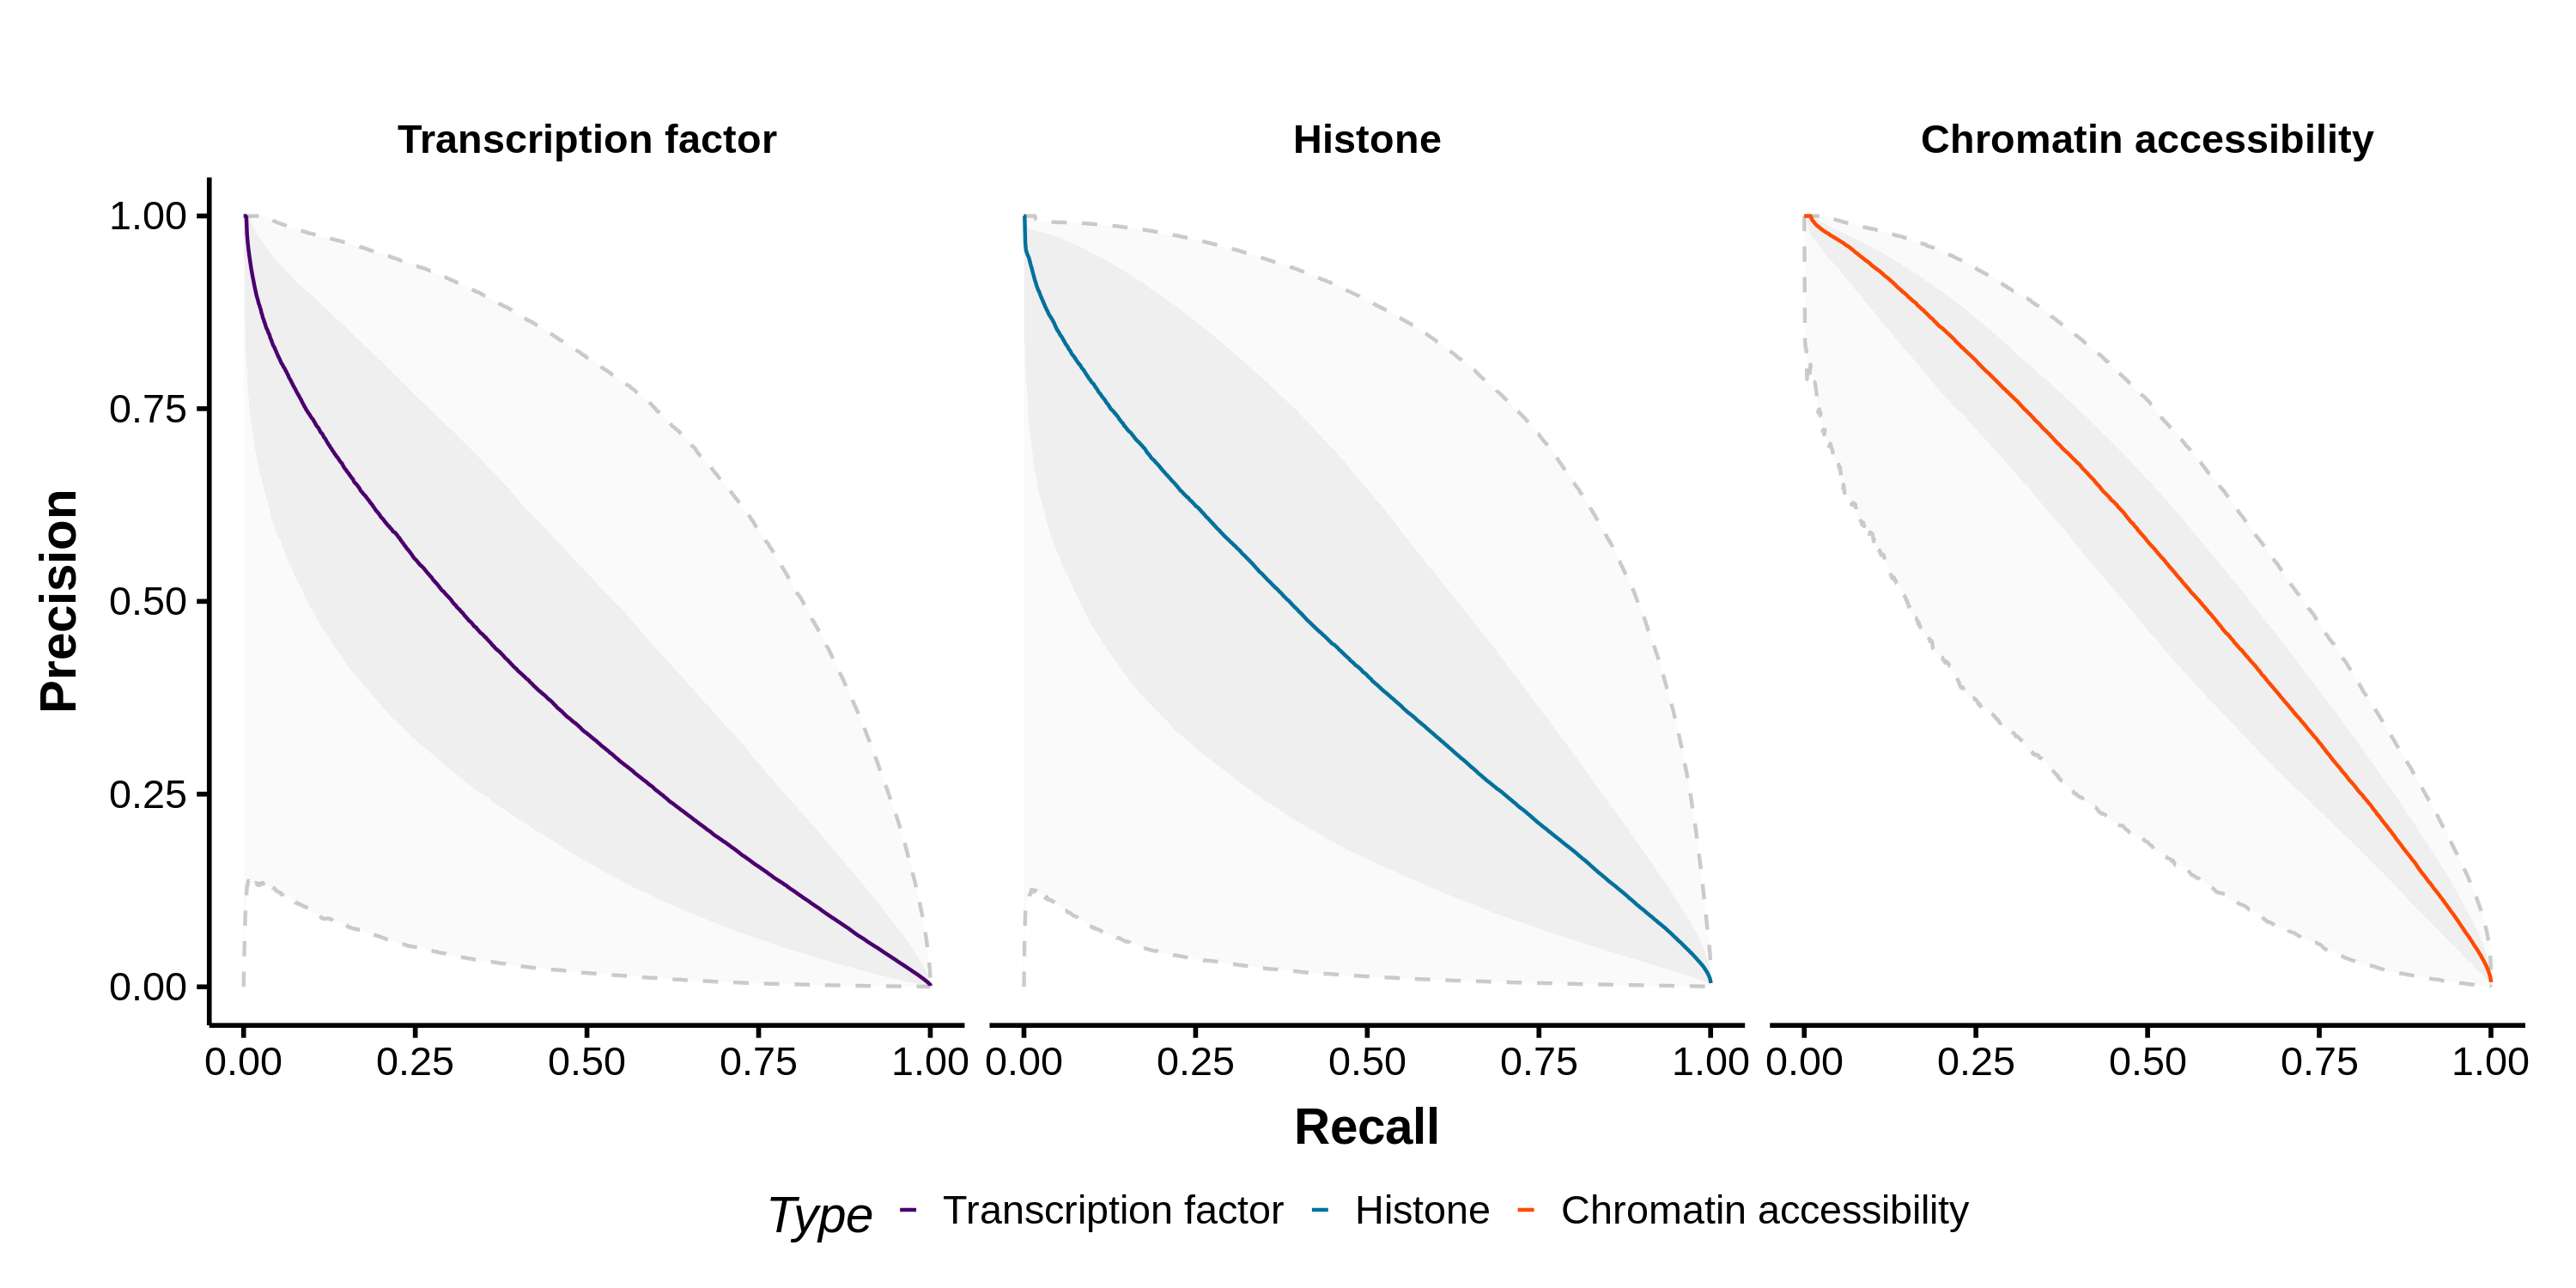

In [8]:
%%R -i plotdata -w 10 -h 5 --units in -r 300

require(ggplot2)
#https://rpubs.com/Koundy/71792
theme_Publication <- function(base_size=14, base_family="Helvetica") {
      library(grid)
      library(ggthemes)
      (theme_foundation(base_size=base_size, base_family=base_family)
       + theme(plot.title = element_text(face = "bold",
                                         size = rel(1.2), hjust = 0.5),
               text = element_text(),
               panel.background = element_rect(colour = NA),
               plot.background = element_rect(colour = NA),
               panel.border = element_rect(colour = NA),
               axis.title = element_text(face = "bold",size = rel(1)),
               axis.title.y = element_text(angle=90,vjust =2),
               axis.title.x = element_text(vjust = -0.2),
               axis.text = element_text(), 
               axis.line = element_line(colour="black"),
               axis.ticks = element_line(),
               panel.grid.major = element_blank(),
               panel.grid.minor = element_blank(),
               legend.key = element_rect(colour = NA),
               legend.position = "bottom",
               legend.direction = "horizontal",
               legend.key.size= unit(0.2, "cm"),
               legend.margin = unit(0, "cm"),
               legend.title = element_text(face="italic"),
               plot.margin=unit(c(10,5,5,5),"mm"),
               strip.background=element_rect(colour="#ffffff",fill="#ffffff"),
               strip.text = element_text(face="bold")
          ))
      
}

scale_fill_Publication <- function(...){
      library(scales)
      discrete_scale("fill","Publication",manual_pal(values = c("#386cb0","#fdb462","#7fc97f","#ef3b2c","#662506","#a6cee3","#fb9a99","#984ea3","#ffff33")), ...)

}

scale_colour_Publication <- function(...){
      library(scales)
      discrete_scale("colour","Publication",manual_pal(values = c("#386cb0","#fdb462","#7fc97f","#ef3b2c","#662506","#a6cee3","#fb9a99","#984ea3","#ffff33")), ...)

}

plotdata$Type = factor(plotdata$target, levels=c('TF','Histone','Chromatin accessibility'))
levels(plotdata$Type) <- c('Transcription factor','Histone','Chromatin accessibility')
print(levels(plotdata$Type))
p = ggplot(plotdata)+geom_ribbon(aes(x=x,ymin=y25,ymax=y75,group=Type),alpha=0.05)+
 geom_ribbon(aes(x=x,ymin=y5,ymax=y95,group=Type),alpha=0.025)+
 geom_line(aes(x=x,y=y95,group=Type),linetype=2,alpha=0.2)+
 geom_line(aes(x=x,y=y5,group=Type),linetype=2,alpha=0.2)+
    geom_line(aes(x=x,y=y50,color=Type))+theme_minimal()+
facet_wrap('~Type',nrow=1)+xlab('Recall')+ylab('Precision')+
scale_color_manual(values=c('#4B006E', '#03719C', '#FE4B03'))+theme_Publication()
ggsave('./figures/perf.prec_recall.pdf')
p

In [9]:
pr_y_formatted_fc = ((pr_y_formatted)/(1-pr_y_formatted)) / ((pr_baseline[~np.isnan(aucs),None])/(1-pr_baseline[~np.isnan(aucs),None]))


plotdata = pd.concat([pd.DataFrame({'x':x_formatted,'y50':np.percentile(pr_y_formatted_fc[np.isin(inds_formatted, tf_inds),:], 50, axis=0),
                     'y75':np.percentile(pr_y_formatted_fc[np.isin(inds_formatted, tf_inds),:], 75, axis=0),
                     'y25':np.percentile(pr_y_formatted_fc[np.isin(inds_formatted, tf_inds),:], 25, axis=0),
                     'y5':np.percentile(pr_y_formatted_fc[np.isin(inds_formatted, tf_inds),:], 5, axis=0),
                     'y95':np.percentile(pr_y_formatted_fc[np.isin(inds_formatted, tf_inds),:], 95, axis=0),
                     'target':'TF'}),
                   pd.DataFrame({'x':x_formatted,'y50':np.percentile(pr_y_formatted_fc[np.isin(inds_formatted, histone_inds),:], 50, axis=0),
                     'y75':np.percentile(pr_y_formatted_fc[np.isin(inds_formatted, histone_inds),:], 75, axis=0),
                     'y25':np.percentile(pr_y_formatted_fc[np.isin(inds_formatted, histone_inds),:], 25, axis=0),
                     'y5':np.percentile(pr_y_formatted_fc[np.isin(inds_formatted, histone_inds),:], 5, axis=0),
                     'y95':np.percentile(pr_y_formatted_fc[np.isin(inds_formatted, histone_inds),:], 95, axis=0),
                     'target':'Histone'}),
                   pd.DataFrame({'x':x_formatted,'y50':np.percentile(pr_y_formatted_fc[np.isin(inds_formatted, access_inds),:], 50, axis=0),
                     'y75':np.percentile(pr_y_formatted_fc[np.isin(inds_formatted, access_inds),:], 75, axis=0),
                     'y25':np.percentile(pr_y_formatted_fc[np.isin(inds_formatted, access_inds),:], 25, axis=0),
                     'y5':np.percentile(pr_y_formatted_fc[np.isin(inds_formatted, access_inds),:], 5, axis=0),
                     'y95':np.percentile(pr_y_formatted_fc[np.isin(inds_formatted, access_inds),:], 95, axis=0),
                     'target':'Chromatin accessibility'})])

/mnt/home/jzhou/anaconda2/envs/graphseq/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/mnt/home/jzhou/anaconda2/envs/graphseq/lib/python3.7/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


[1] "Transcription factor"    "Histone"                
[3] "Chromatin accessibility"


R[write to console]: Saving 10 x 5 in image



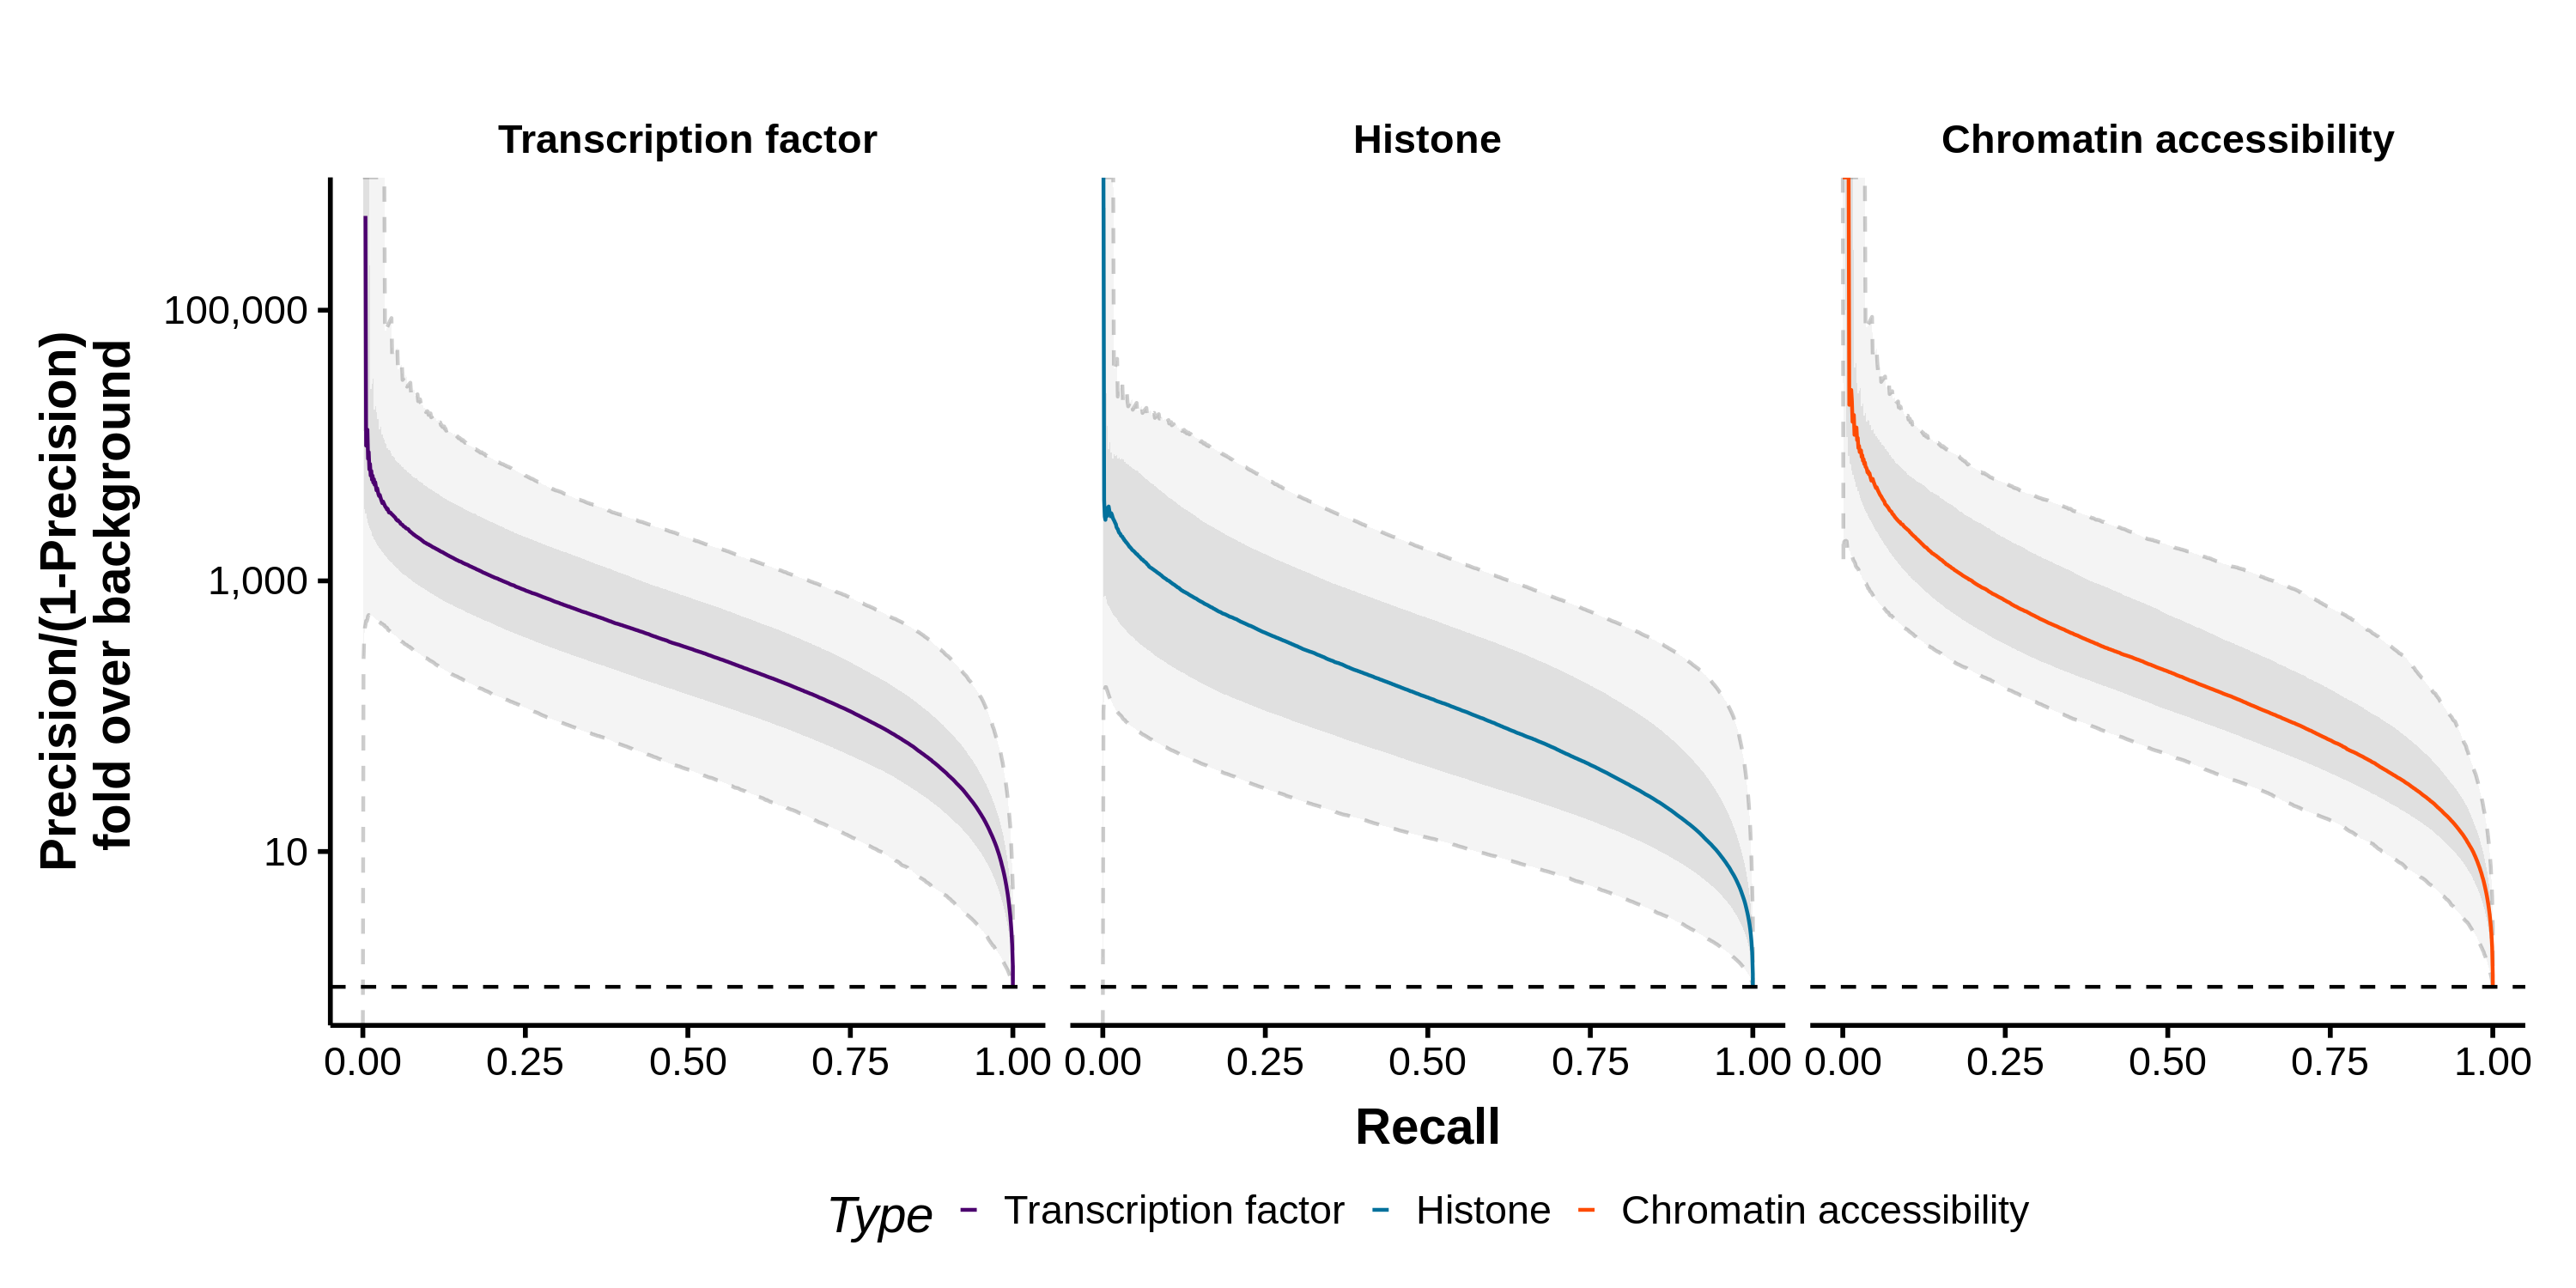

In [10]:
%%R -i plotdata -w 10 -h 5 --units in -r 300

require(ggplot2)

plotdata$Type = factor(plotdata$target, levels=c('TF','Histone','Chromatin accessibility'))
levels(plotdata$Type) <- c('Transcription factor','Histone','Chromatin accessibility')
print(levels(plotdata$Type))
p = ggplot(plotdata)+geom_ribbon(aes(x=x,ymin=y25,ymax=y75,group=Type),alpha=0.1)+
 geom_ribbon(aes(x=x,ymin=y5,ymax=y95,group=Type),alpha=0.05)+
 geom_line(aes(x=x,y=y95,group=Type),linetype=2,alpha=0.2)+
 geom_line(aes(x=x,y=y5,group=Type),linetype=2,alpha=0.2)+
    geom_line(aes(x=x,y=y50,color=Type))+theme_minimal()+
facet_wrap('~Type',nrow=1)+xlab('Recall')+ylab('Precision/(1-Precision)\n fold over background')+
geom_hline(yintercept=1,linetype=2)+
scale_color_manual(values=c('#4B006E', '#03719C', '#FE4B03'))+theme_Publication()+scale_y_log10(labels = scales::comma)

ggsave('./figures/perf.prec_recall_foldchange.pdf')
p

In [11]:
plotdata = pd.concat([pd.DataFrame({'x':x_formatted[:-1],'y50':np.percentile(roc_y_formatted[np.isin(inds_formatted, tf_inds),:], 50, axis=0),
                     'y75':np.percentile(roc_y_formatted[np.isin(inds_formatted, tf_inds),:], 75, axis=0),
                     'y25':np.percentile(roc_y_formatted[np.isin(inds_formatted, tf_inds),:], 25, axis=0),
                     'y5':np.percentile(roc_y_formatted[np.isin(inds_formatted, tf_inds),:], 5, axis=0),
                     'y95':np.percentile(roc_y_formatted[np.isin(inds_formatted, tf_inds),:], 95, axis=0),
                     'target':'TF'}),
                   pd.DataFrame({'x':x_formatted[:-1],'y50':np.percentile(roc_y_formatted[np.isin(inds_formatted, histone_inds),:], 50, axis=0),
                     'y75':np.percentile(roc_y_formatted[np.isin(inds_formatted, histone_inds),:], 75, axis=0),
                     'y25':np.percentile(roc_y_formatted[np.isin(inds_formatted, histone_inds),:], 25, axis=0),
                     'y5':np.percentile(roc_y_formatted[np.isin(inds_formatted, histone_inds),:], 5, axis=0),
                     'y95':np.percentile(roc_y_formatted[np.isin(inds_formatted, histone_inds),:], 95, axis=0),
                     'target':'Histone'}),
                   pd.DataFrame({'x':x_formatted[:-1],'y50':np.percentile(roc_y_formatted[np.isin(inds_formatted, access_inds),:], 50, axis=0),
                     'y75':np.percentile(roc_y_formatted[np.isin(inds_formatted, access_inds),:], 75, axis=0),
                     'y25':np.percentile(roc_y_formatted[np.isin(inds_formatted, access_inds),:], 25, axis=0),
                     'y5':np.percentile(roc_y_formatted[np.isin(inds_formatted, access_inds),:], 5, axis=0),
                     'y95':np.percentile(roc_y_formatted[np.isin(inds_formatted, access_inds),:], 95, axis=0),
                     'target':'Chromatin accessibility'})])

[1] "Transcription factor"    "Histone"                
[3] "Chromatin accessibility"


R[write to console]: Saving 10 x 5 in image



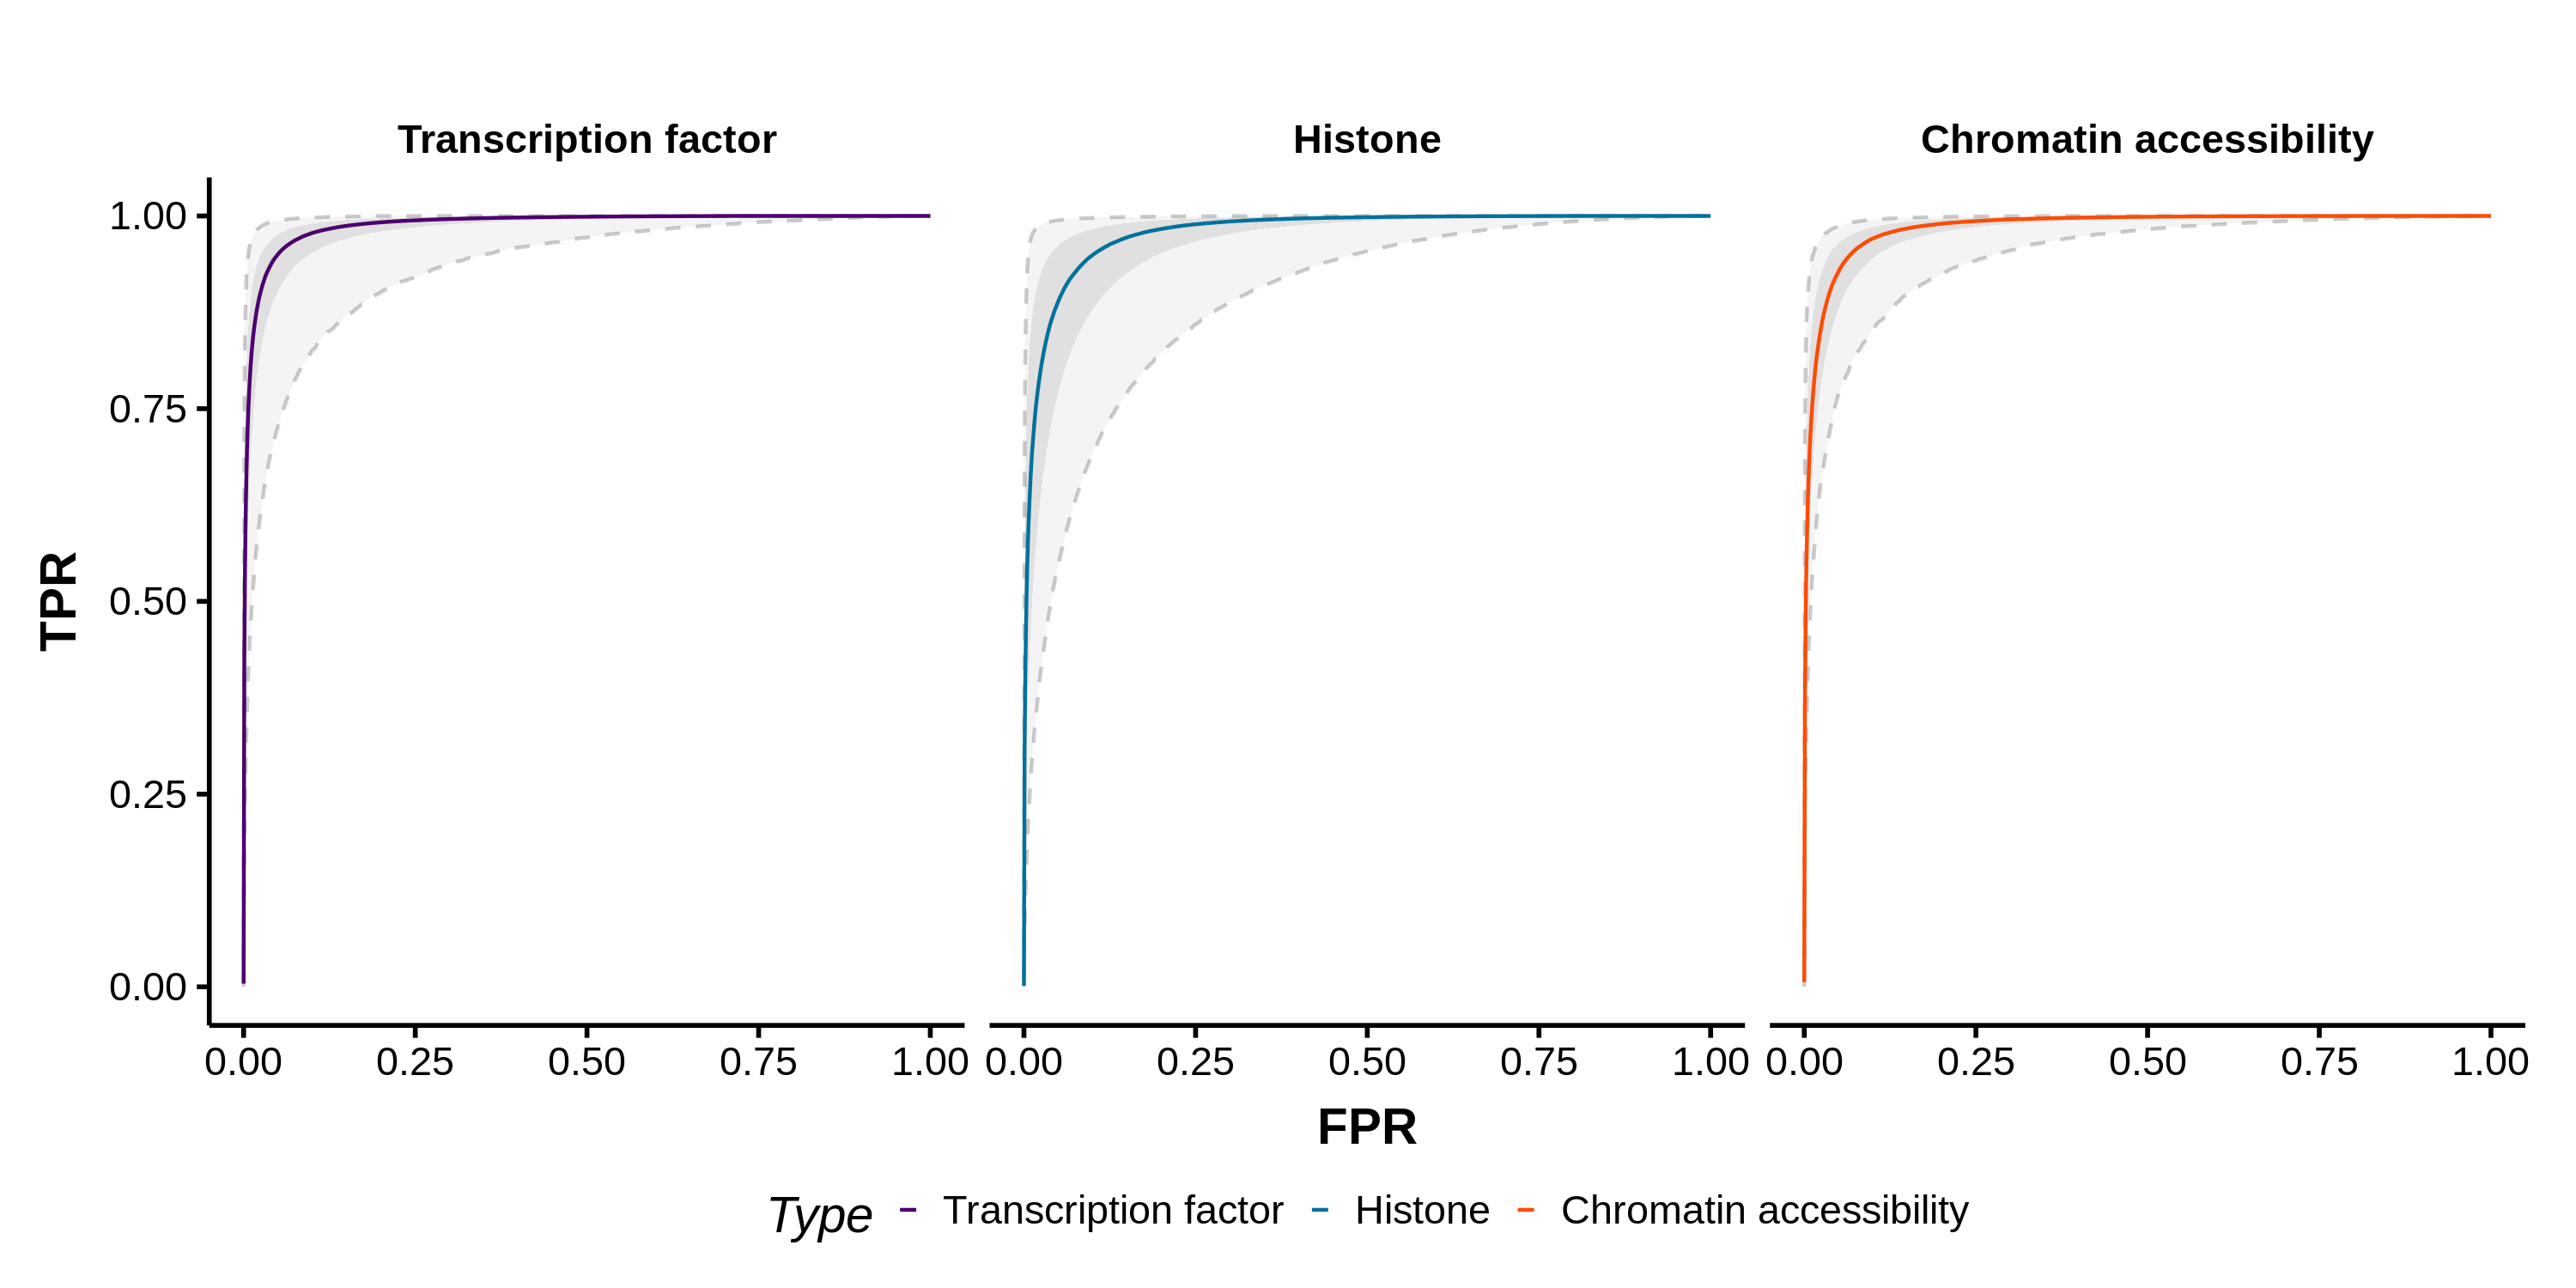

In [12]:
%%R -i plotdata -w 10 -h 5 --units in -r 300

require(ggplot2)


plotdata$Type = factor(plotdata$target, levels=c('TF','Histone','Chromatin accessibility'))
levels(plotdata$Type) <- c('Transcription factor','Histone','Chromatin accessibility')
print(levels(plotdata$Type))
p = ggplot(plotdata)+geom_ribbon(aes(x=x,ymin=y25,ymax=y75,group=Type),alpha=0.1)+
 geom_ribbon(aes(x=x,ymin=y5,ymax=y95,group=Type),alpha=0.05)+
 geom_line(aes(x=x,y=y95,group=Type),linetype=2,alpha=0.2)+
 geom_line(aes(x=x,y=y5,group=Type),linetype=2,alpha=0.2)+
    geom_line(aes(x=x,y=y50,color=Type))+theme_minimal()+
facet_wrap('~Type',nrow=1,scales='free_x')+xlab('FPR')+ylab('TPR')+
scale_color_manual(values=c('#4B006E', '#03719C', '#FE4B03'))+theme_Publication()

ggsave('./figures/perf.roc.pdf')
p

In [13]:
torch.save({'roc_y_formatted':roc_y_formatted, 'pr_y_formatted':pr_y_formatted,\
            'x_formatted':x_formatted, 'inds_formatted':inds_formatted}, \
           './sei_data/AUC.rocpr.pth')